# Mobile Application Marketing (Part II)


## Redefining the data set

A few adjustments were made to the original dataset based on the latest discoveries. 

Now the dataset has the following columns:

- date                
- sku                 
- network_name        
- region              
- spend               
- d0_paid_revenue     
- d0_organic_revenue  
- d7_paid_revenue     
- d7_organic_revenue  
- d14_paid_revenue    
- d14_organic_revenue 
- d30_paid_revenue    
- d30_organic_revenue 
- d60_paid_revenue    
- d60_organic_revenue 
- d90_paid_revenue    
- d90_organic_revenue 
- d120_paid_revenue   
- d120_organic_revenue
- d150_paid_revenue   
- d150_organic_revenue
- d180_paid_revenue   
- d180_organic_revenue
- d210_paid_revenue   
- d210_organic_revenue
- d240_paid_revenue   
- d240_organic_revenue
- d270_paid_revenue   
- d270_organic_revenue
- d300_paid_revenue   
- d300_organic_revenue
- d330_paid_revenue   
- d330_organic_revenue
- d360_paid_revenue   
- d360_organic_revenue

Specific modeling for the app "App T (android)" will be implemented since the apps behave differently from each other. All the channels and regions for this specific app will be used for modeling.

In [3]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [4]:
data = pd.read_csv('data/sample_data_2_ofuscated.csv')
data.head()

date              sku network_name region        spend  \
0  2021-01-09 00:00:00  App T (android)    Channel F     T1  8643.714396   
1  2022-04-06 00:00:00  App T (android)    Channel F  Other   458.032503   
2  2022-02-23 00:00:00  App T (android)    Channel F     T3   529.534628   
3  2020-05-10 00:00:00  App T (android)    Channel F     T2   288.020000   
4  2022-04-27 00:00:00  App T (android)    Channel F     T3   121.620458   

   d0_paid_revenue  d0_organic_revenue  d7_paid_revenue  d7_organic_revenue  \
0       3690.80835          651.381650       5932.84372         1209.219720   
1        167.69770           16.234457        275.22140           36.814774   
2        186.28890            5.182008        268.48480            7.485552   
3        120.78060           12.869016        195.67806           23.203026   
4         76.96390            1.642729        137.76170            3.693580   

   d14_paid_revenue  ...  d240_paid_revenue  d240_organic_revenue  \
0        6555.86748  ...         9737.95897           1874.807299   
1         316.85140  ...          410.66620             50.585472   
2         295.22240  ...          346.26800             12.467445   
3         220.78707  ...          368.53602             68.571153   
4         144.49770  ...          159.08490             10.966451   

   d270_paid_revenue  d270_organic_revenue  d300_paid_revenue  \
0         9856.36507           1912.001697         9920.16257   
1                NaN                   NaN                NaN   
2          348.81960             12.562045          351.02740   
3          373.23396             70.326710          414.20781   
4                NaN                   NaN                NaN   

   d300_organic_revenue  d330_paid_revenue  d330_organic_revenue  \
0           1928.197908         9975.10027           1942.910550   
1                   NaN                NaN                   NaN   
2             12.562045                NaN                   NaN   
3             72.139378          418.22165             74.169235   
4                   NaN                NaN                   NaN   

   d360_paid_revenue  d360_organic_revenue  
0        10069.34577           1966.276748  
1                NaN                   NaN  
2                NaN                   NaN  
3          419.78115             75.330767  
4                NaN                   NaN  

[5 rows x 35 columns]

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27328 entries, 0 to 27327
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  27328 non-null  object 
 1   sku                   27328 non-null  object 
 2   network_name          27328 non-null  object 
 3   region                27328 non-null  object 
 4   spend                 26979 non-null  float64
 5   d0_paid_revenue       26979 non-null  float64
 6   d0_organic_revenue    26979 non-null  float64
 7   d7_paid_revenue       26764 non-null  float64
 8   d7_organic_revenue    26764 non-null  float64
 9   d14_paid_revenue      26586 non-null  float64
 10  d14_organic_revenue   26586 non-null  float64
 11  d30_paid_revenue      26176 non-null  float64
 12  d30_organic_revenue   26176 non-null  float64
 13  d60_paid_revenue      25498 non-null  float64
 14  d60_organic_revenue   25498 non-null  float64
 15  d90_paid_revenue   

In [6]:
data.isna().sum()

date                        0
sku                         0
network_name                0
region                      0
spend                     349
d0_paid_revenue           349
d0_organic_revenue        349
d7_paid_revenue           564
d7_organic_revenue        564
d14_paid_revenue          742
d14_organic_revenue       742
d30_paid_revenue         1152
d30_organic_revenue      1152
d60_paid_revenue         1830
d60_organic_revenue      1830
d90_paid_revenue         2730
d90_organic_revenue      2730
d120_paid_revenue        3630
d120_organic_revenue     3630
d150_paid_revenue        4530
d150_organic_revenue     4530
d180_paid_revenue        5430
d180_organic_revenue     5430
d210_paid_revenue        6330
d210_organic_revenue     6330
d240_paid_revenue        7230
d240_organic_revenue     7230
d270_paid_revenue        8130
d270_organic_revenue     8130
d300_paid_revenue        9030
d300_organic_revenue     9030
d330_paid_revenue        9930
d330_organic_revenue     9930
d360_paid_

In [7]:
paid_revenue_columns = [col for col in data.columns if 'paid_revenue' in col]
paid_revenue_data = data[paid_revenue_columns].copy()

In [8]:
cohorts = []
percents = []

for c in range(2,13):
  cohort = c*30
  prev_cohort = (c-1)*30
  percent = len(data.query(f'd{cohort}_paid_revenue > 0 & d{cohort}_paid_revenue == d{prev_cohort}_paid_revenue'))/len(data.query(f'd{cohort}_paid_revenue > 0'))
  cohorts.append(cohort)
  percents.append(percent*100)
  # print(f'd{cohort} percent: {percent}')
  
  
no_growth_percent_df = pd.DataFrame({'cohort': cohorts, 'no_growth_percent': percents})
no_growth_percent_df = no_growth_percent_df.set_index('cohort')
no_growth_percent_df

no_growth_percent
cohort                   
60              21.744792
90              25.614444
120             27.435183
150             29.496358
180             30.887428
210             31.764386
240             32.860098
270             33.925079
300             34.487689
330             35.834314
360             38.143686

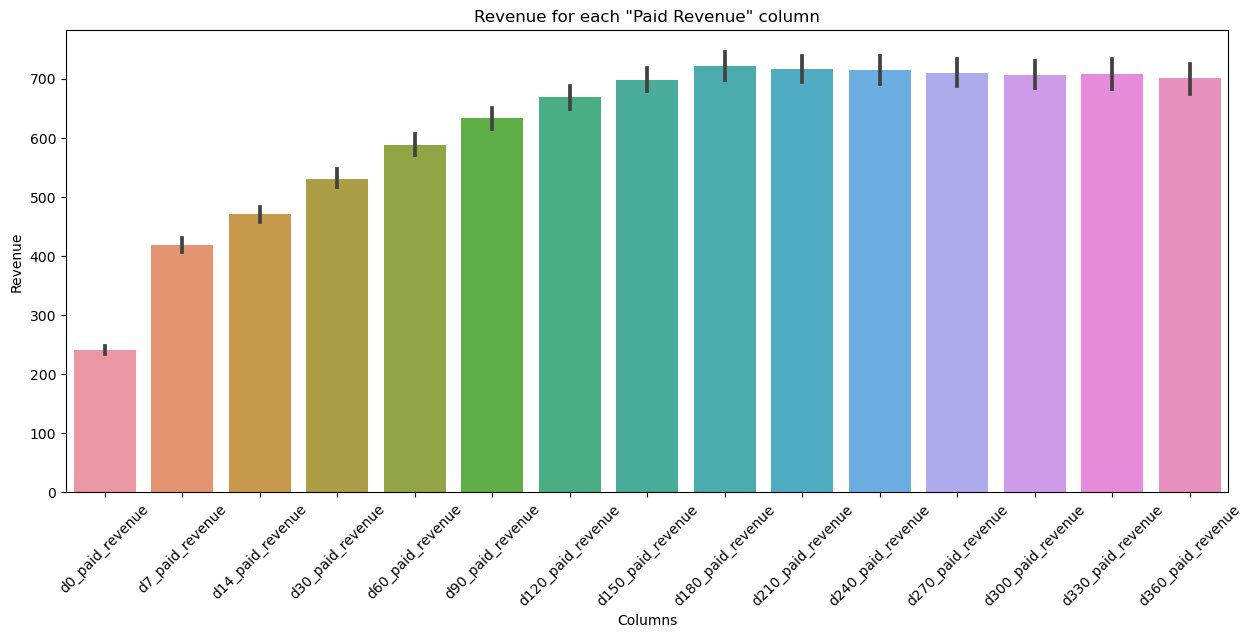

In [9]:
# Reshape the DataFrame
paid_revenue_data_melted = paid_revenue_data.melt(var_name='Column', value_name='Revenue')

# Create the bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x='Column', y='Revenue', data=paid_revenue_data_melted)
plt.title('Revenue for each "Paid Revenue" column')
plt.ylabel('Revenue')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()


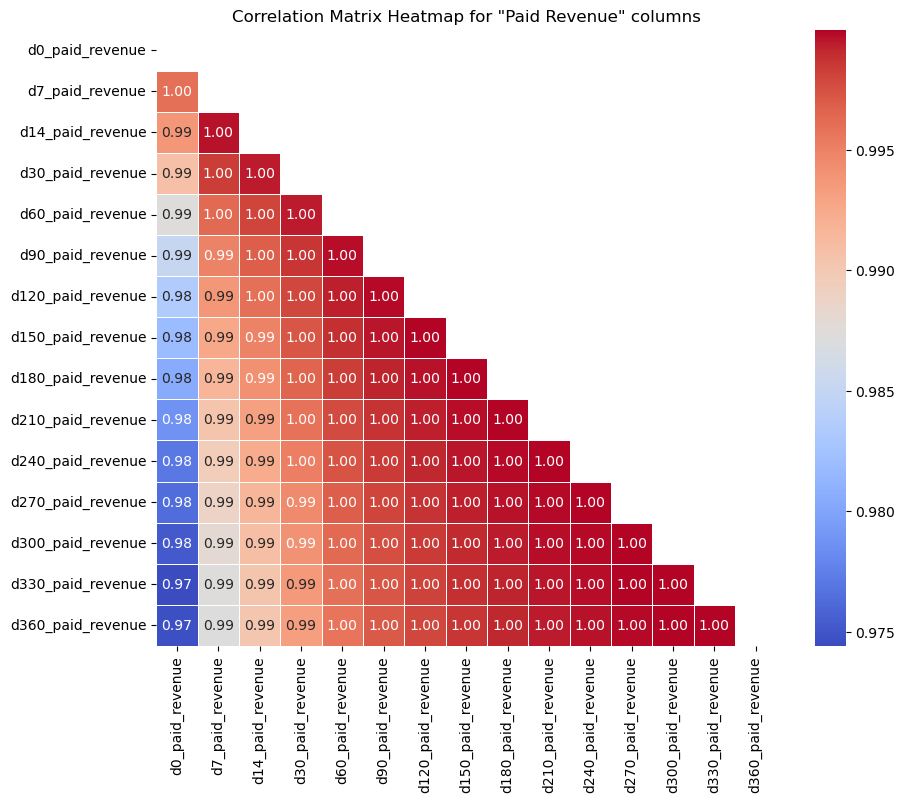

In [10]:
correlation_matrix = paid_revenue_data.corr()

# Remove duplicate correlations by setting upper-triangular matrix values to NaN
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap for "Paid Revenue" columns')
plt.show()


- The columns related to earlier days (e.g., d0_paid_revenue, d7_paid_revenue, etc.) are highly correlated with each other.
- As we move towards later days, the correlation slightly decreases but remains very high.

In [11]:
min(data['date']), max(data['date'])

('2020-04-01 00:00:00', '2023-01-01 00:00:00')

In [12]:
d14_cols = ['spend','d0_paid_revenue', 'd0_organic_revenue','d7_paid_revenue', 'd7_organic_revenue','d14_paid_revenue', 'd14_organic_revenue']
data[d14_cols]

spend  d0_paid_revenue  d0_organic_revenue  d7_paid_revenue  \
0      8643.714396       3690.80835          651.381650       5932.84372   
1       458.032503        167.69770           16.234457        275.22140   
2       529.534628        186.28890            5.182008        268.48480   
3       288.020000        120.78060           12.869016        195.67806   
4       121.620458         76.96390            1.642729        137.76170   
...            ...              ...                 ...              ...   
27323     0.000000          0.00000            0.000190          0.00000   
27324     0.000000          0.00000            0.049252          0.00000   
27325     0.000000          0.00000            0.000018          0.00000   
27326     0.000000          0.00000            0.064551          0.00000   
27327     0.000000          0.00000            0.027620          0.00000   

       d7_organic_revenue  d14_paid_revenue  d14_organic_revenue  
0             1209.219720        6555.86748          1373.111694  
1               36.814774         316.85140            40.384622  
2                7.485552         295.22240             8.269822  
3               23.203026         220.78707            28.221605  
4                3.693580         144.49770             3.942621  
...                   ...               ...                  ...  
27323            0.000190           0.00000             0.000190  
27324            0.049252           0.00000             0.049252  
27325            0.000018           0.00000             0.000018  
27326            0.064551           0.00000             0.064551  
27327            0.027620           0.00000             0.027620  

[27328 rows x 7 columns]

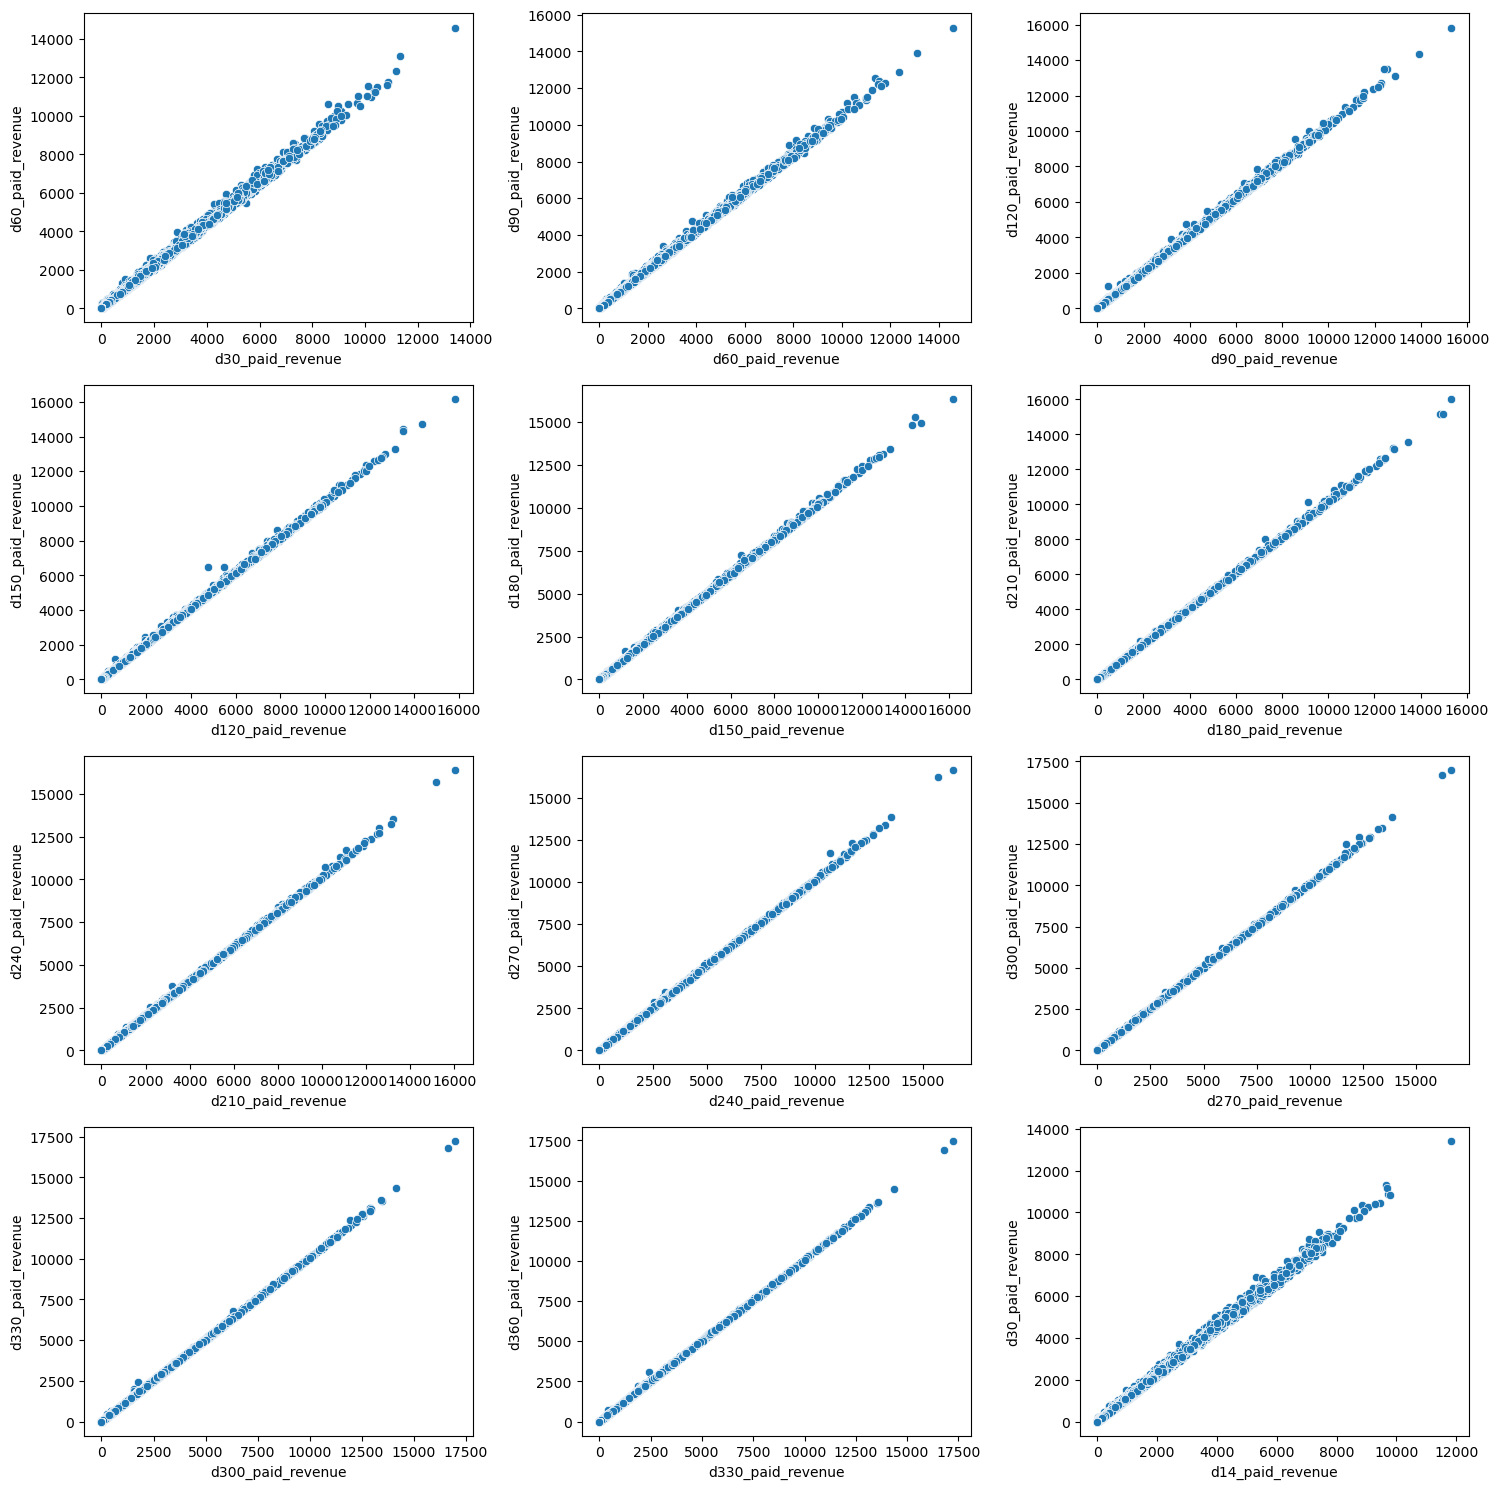

In [13]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15)) # Define a grid of 4x3 subplots
axs = axs.ravel() # Flatten the grid into a 1D array to easily iterate over

for i, c in enumerate(range(2, 14)): # Modify the range to fit 12 plots

  if i == 11:
    sns.scatterplot(data=data, x=f'd14_paid_revenue', y=f'd30_paid_revenue', ax=axs[i]) 
  else:
    cohort = c * 30
    prev_cohort = (c - 1) * 30
    sns.scatterplot(data=data, y=f'd{cohort}_paid_revenue', x=f'd{prev_cohort}_paid_revenue', ax=axs[i]) 

plt.tight_layout() # Improve appearance
plt.show() # Show the plot

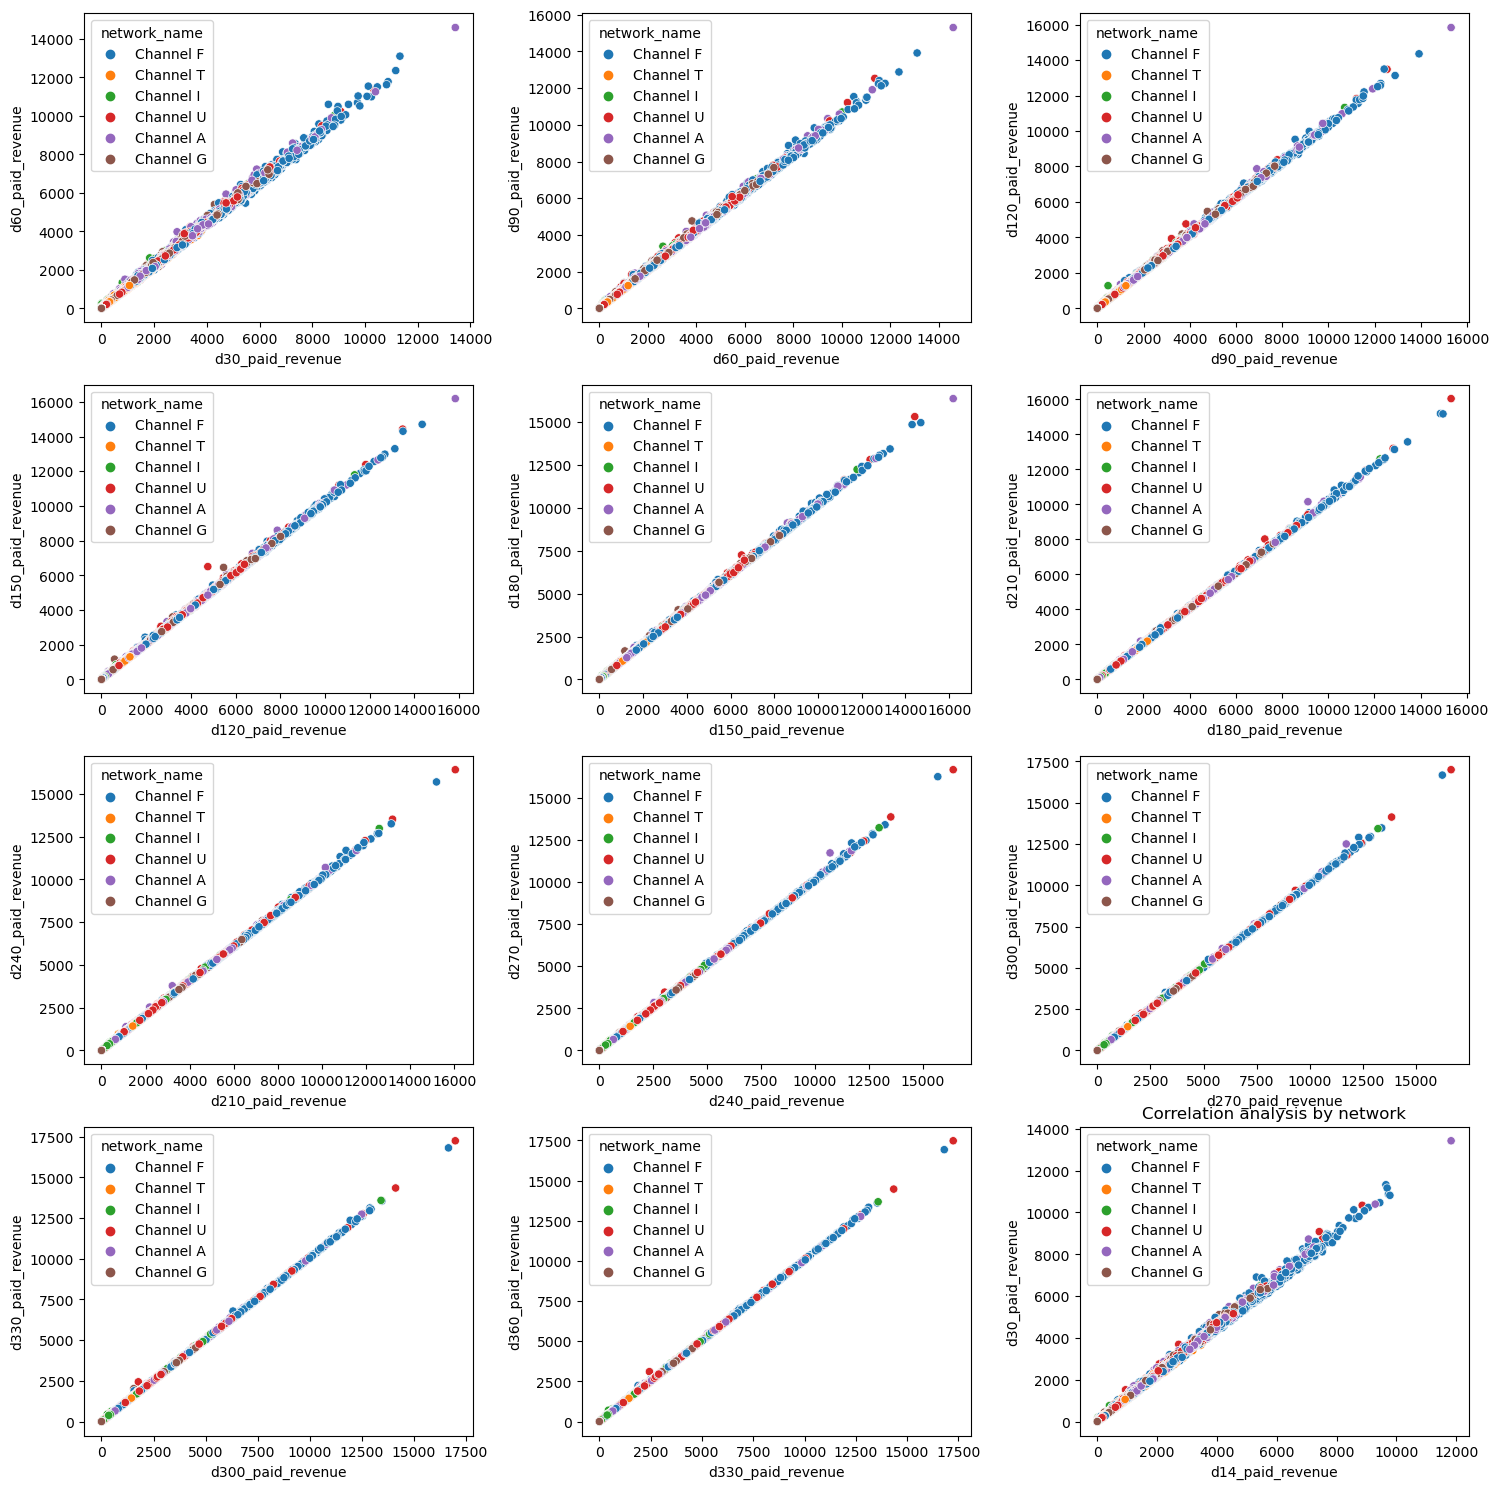

In [14]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15)) # Define a grid of 4x3 subplots
axs = axs.ravel() # Flatten the grid into a 1D array to easily iterate over

for i, c in enumerate(range(2, 14)): # Modify the range to fit 12 plots

  if i == 11:
    sns.scatterplot(data=data, x=f'd14_paid_revenue', y=f'd30_paid_revenue', hue='network_name', ax=axs[i]) 
  else:
    cohort = c * 30
    prev_cohort = (c - 1) * 30
    sns.scatterplot(data=data, y=f'd{cohort}_paid_revenue', x=f'd{prev_cohort}_paid_revenue', hue='network_name', ax=axs[i]) 

plt.tight_layout() # Improve appearance
plt.title('Correlation analysis by network')
plt.show() # Show the plot

Most of the data seems to be from `Channel F` but there's a fair amount of data from other channels

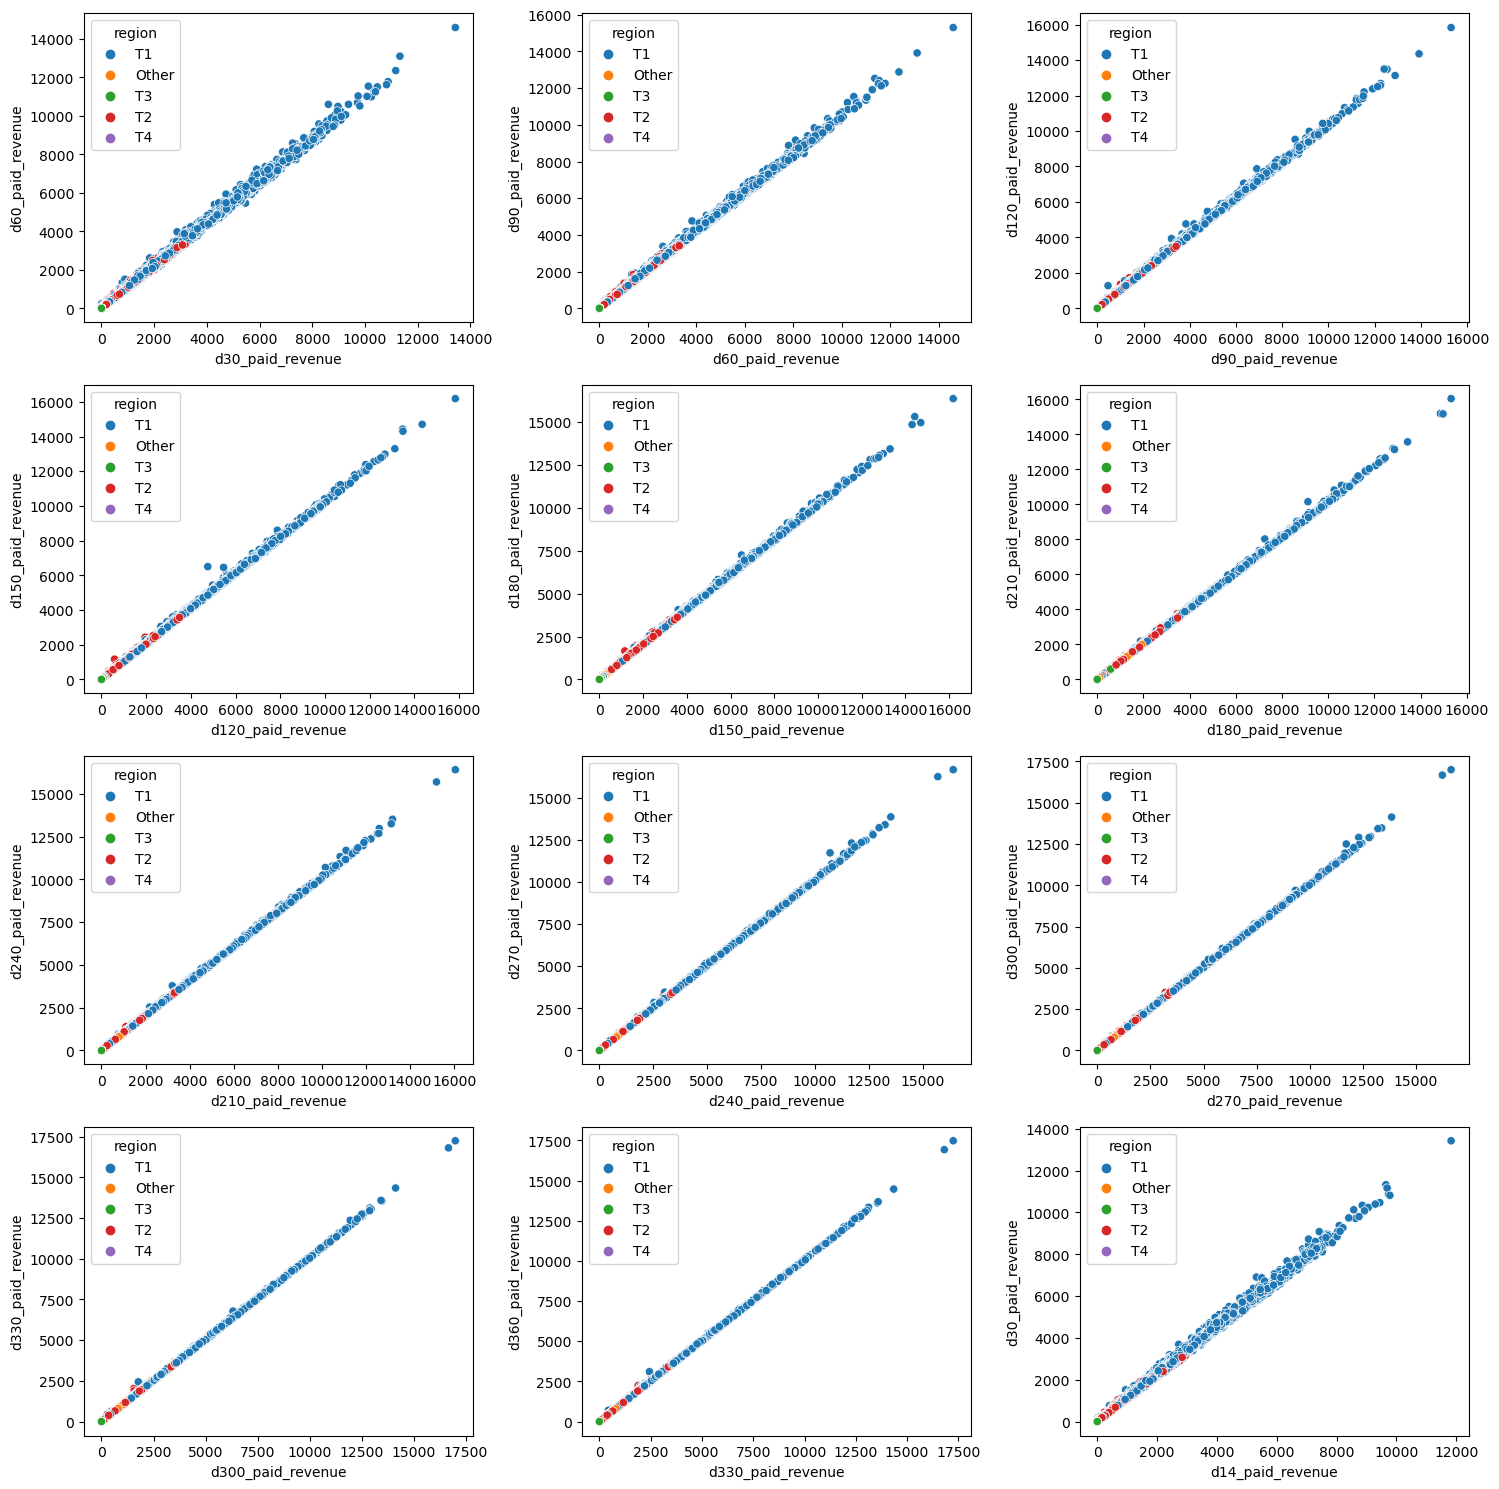

In [15]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15)) # Define a grid of 4x3 subplots
axs = axs.ravel() # Flatten the grid into a 1D array to easily iterate over

for i, c in enumerate(range(2, 14)): # Modify the range to fit 12 plots

  if i == 11:
    sns.scatterplot(data=data, x=f'd14_paid_revenue', y=f'd30_paid_revenue', hue='region', ax=axs[i]) 
  else:
    cohort = c * 30
    prev_cohort = (c - 1) * 30
    sns.scatterplot(data=data, y=f'd{cohort}_paid_revenue', x=f'd{prev_cohort}_paid_revenue', hue='region', ax=axs[i]) 

plt.tight_layout() # Improve appearance
plt.show() # Show the plot

Most of the data belongs to the `T1` region - which makes sense because that's where the majority of the business is concentrated

The correlation is so strong, that adjacent cohorts might be enough to predict. Using the relationship between cohorts described in the plots. 

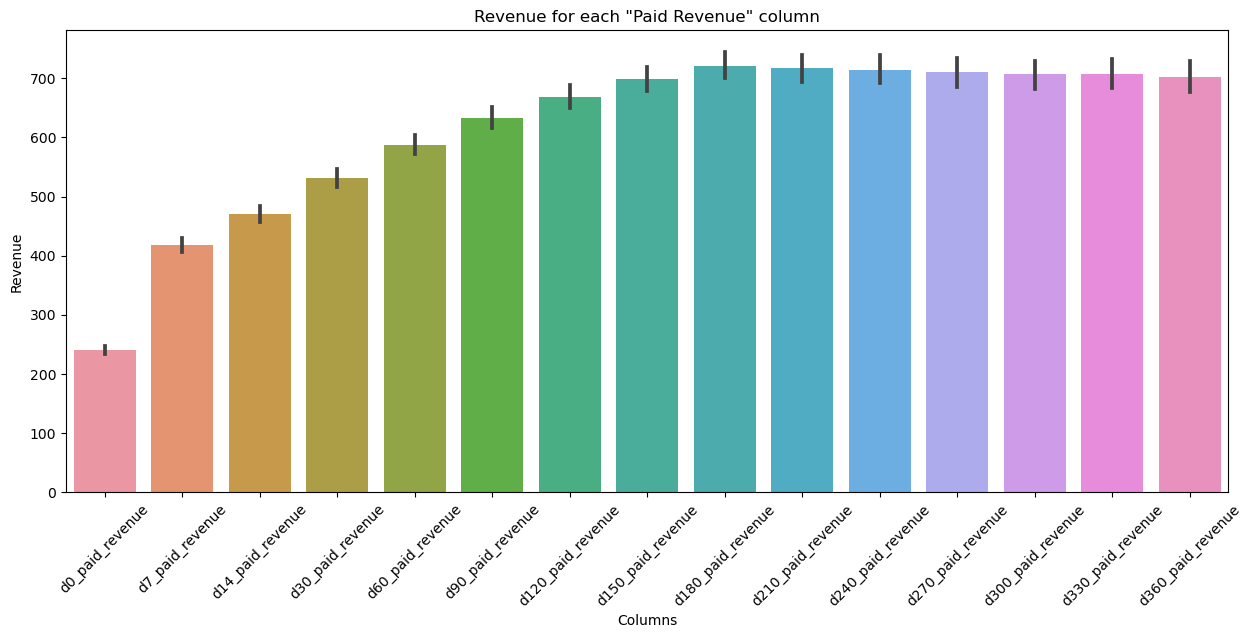

In [16]:
paid_rev_date = data[paid_revenue_columns]

# Reshape the DataFrame
paid_rev_date_melted = paid_rev_date.melt(var_name='Column', value_name='Revenue')

# Create the bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x='Column', y='Revenue', data=paid_rev_date_melted)
plt.title('Revenue for each "Paid Revenue" column')
plt.ylabel('Revenue')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()


### ORGANIC REVENUE ANALYSIS

In [17]:
organic_revenue_columns = [col for col in data.columns if 'organic_revenue' in col]
organic_revenue_data = data[organic_revenue_columns]
organic_revenue_data.describe()

d0_organic_revenue  d7_organic_revenue  d14_organic_revenue  \
count        26979.000000        26764.000000         26586.000000   
mean            33.223118           57.044830            65.345997   
std             78.490424          136.375204           156.920483   
min              0.000000            0.000000             0.000000   
25%              0.153786            0.256188             0.286978   
50%              0.865877            1.551605             1.778936   
75%             19.090421           32.480290            37.158388   
max            758.700923         1385.927492          1619.350873   

       d30_organic_revenue  d60_organic_revenue  d90_organic_revenue  \
count         26176.000000         25498.000000         24598.000000   
mean             76.105108            87.249981            95.865711   
std             183.513193           210.603394           230.422924   
min               0.000000             0.000000             0.000000   
25%               0.314567             0.321051             0.336928   
50%               2.042185             2.187779             2.384596   
75%              42.202987            47.959288            53.319461   
max            1904.581947          2188.839780          2357.083981   

       d120_organic_revenue  d150_organic_revenue  d180_organic_revenue  \
count          23698.000000          22798.000000          21898.000000   
mean             102.948419            108.697532            113.162024   
std              246.614916            259.906975            271.156096   
min                0.000000              0.000000              0.000000   
25%                0.341774              0.350115              0.347894   
50%                2.451247              2.559250              2.580760   
75%               58.283897             62.108954             65.509256   
max             2600.274887           2762.030714           3011.151424   

       d210_organic_revenue  d240_organic_revenue  d270_organic_revenue  \
count          20998.000000          20098.000000          19198.000000   
mean             115.593281            118.290760            120.522517   
std              279.283212            287.208571            294.107468   
min                0.000000              0.000000              0.000000   
25%                0.343774              0.340842              0.327674   
50%                2.597850              2.608042              2.539623   
75%               66.698591             68.103760             69.786454   
max             3213.205411           3334.449754           3446.226955   

       d300_organic_revenue  d330_organic_revenue  d360_organic_revenue  
count          18298.000000          17398.000000          16498.000000  
mean             122.234109            123.866560            125.479456  
std              299.434226            303.532653            308.446789  
min                0.000000              0.000000              0.000000  
25%                0.310478              0.296898              0.286706  
50%                2.405808              2.352277              2.283192  
75%               71.046591             73.331730             74.619965  
max             3507.134261           3544.703608           3582.418025

In [18]:
cohorts = []
percents = []

for c in range(2,13):
  cohort = c*30
  prev_cohort = (c-1)*30
  percent = len(data.query(f'd{cohort}_organic_revenue > 0 & d{cohort}_organic_revenue == d{prev_cohort}_organic_revenue'))/len(data.query(f'd{cohort}_organic_revenue > 0'))
  cohorts.append(cohort)
  percents.append(percent*100)
  # print(f'd{cohort} percent: {percent}')
  
  
no_growth_percent_df = pd.DataFrame({'cohort': cohorts, 'no_growth_percent': percents})
no_growth_percent_df = no_growth_percent_df.set_index('cohort')
no_growth_percent_df

no_growth_percent
cohort                   
60              17.516319
90              23.758880
120             26.232903
150             28.670167
180             29.295669
210             29.927257
240             31.266915
270             31.021195
300             32.250267
330             33.767541
360             36.558064

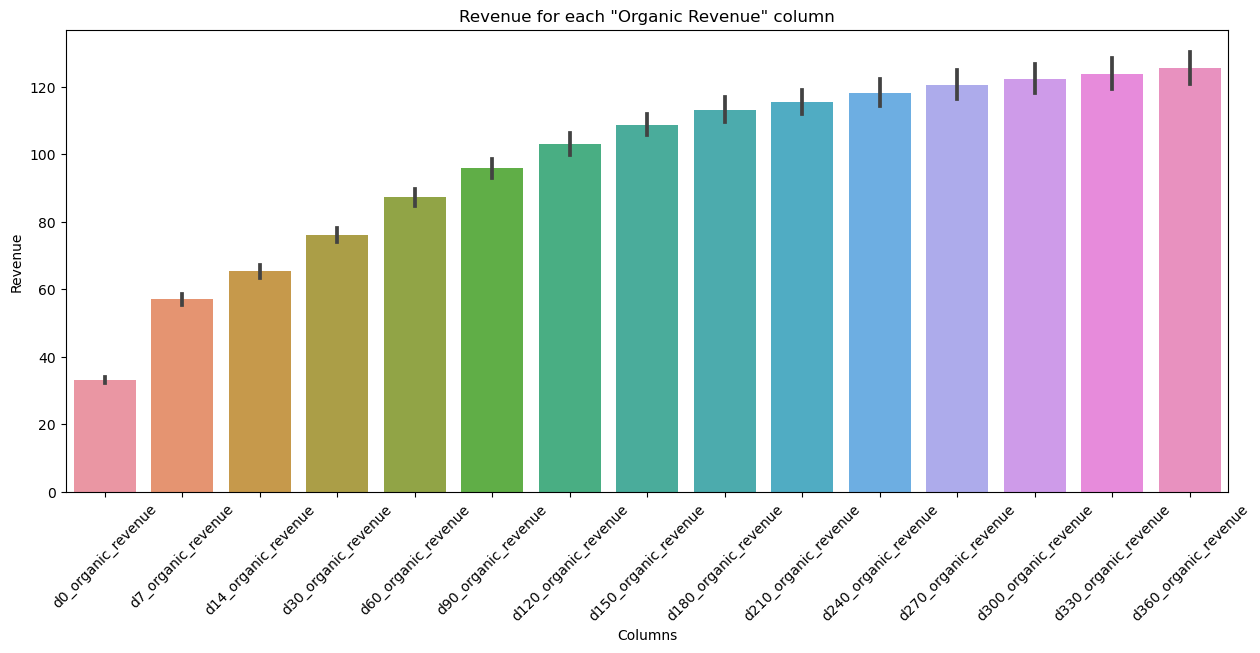

In [19]:
# Reshape the DataFrame
organic_revenue_data_melted = organic_revenue_data.melt(var_name='Column', value_name='Revenue')

# Create the bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x='Column', y='Revenue', data=organic_revenue_data_melted)
plt.title('Revenue for each "Organic Revenue" column')
plt.ylabel('Revenue')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()


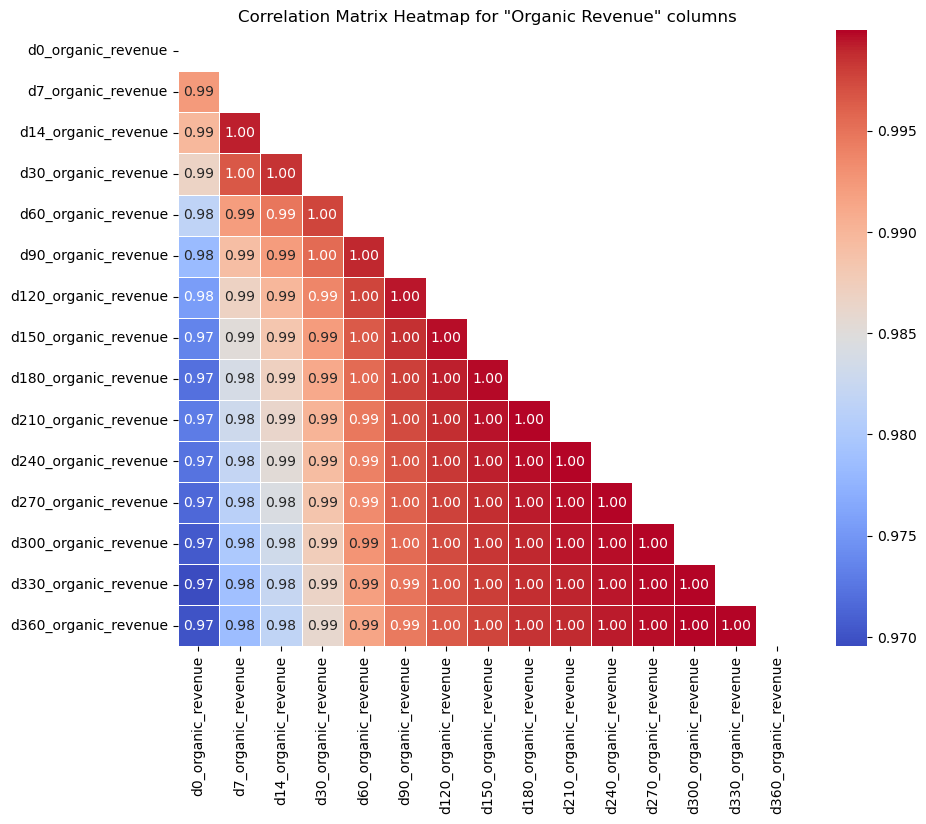

In [20]:
correlation_matrix = organic_revenue_data.corr()

# Remove duplicate correlations by setting upper-triangular matrix values to NaN
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap for "Organic Revenue" columns')
plt.show()


It seems that the "organic revenue" columns also have strong correlations with each other, though there are some variations when compared to the "paid revenue" correlations.

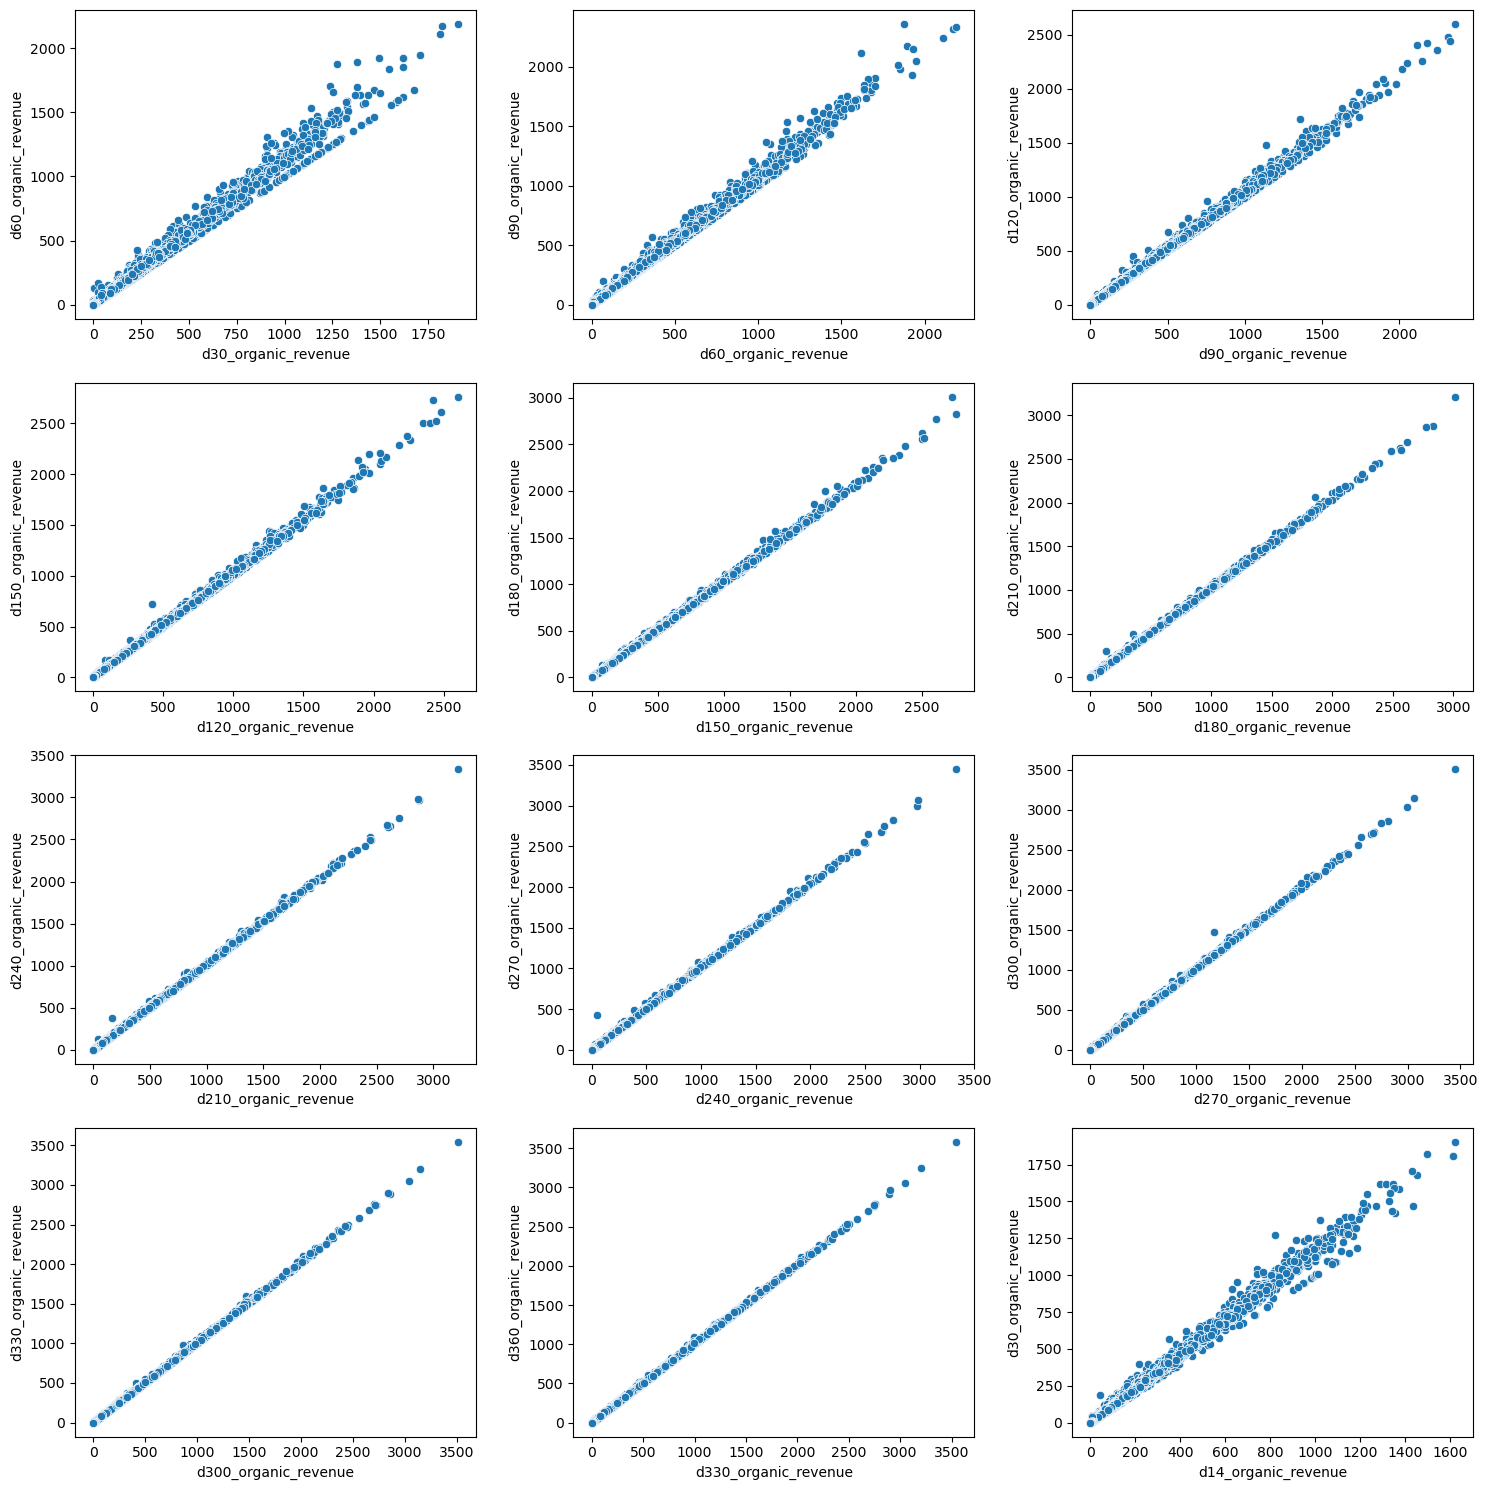

In [21]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15)) # Define a grid of 4x3 subplots
axs = axs.ravel() # Flatten the grid into a 1D array to easily iterate over

for i, c in enumerate(range(2, 14)): # Modify the range to fit 12 plots

  if i == 11:
    sns.scatterplot(data=data, x=f'd14_organic_revenue', y=f'd30_organic_revenue', ax=axs[i]) 
  else:
    cohort = c * 30
    prev_cohort = (c - 1) * 30
    sns.scatterplot(data=data, y=f'd{cohort}_organic_revenue', x=f'd{prev_cohort}_organic_revenue', ax=axs[i]) 

plt.tight_layout() # Improve appearance
plt.show() # Show the plot

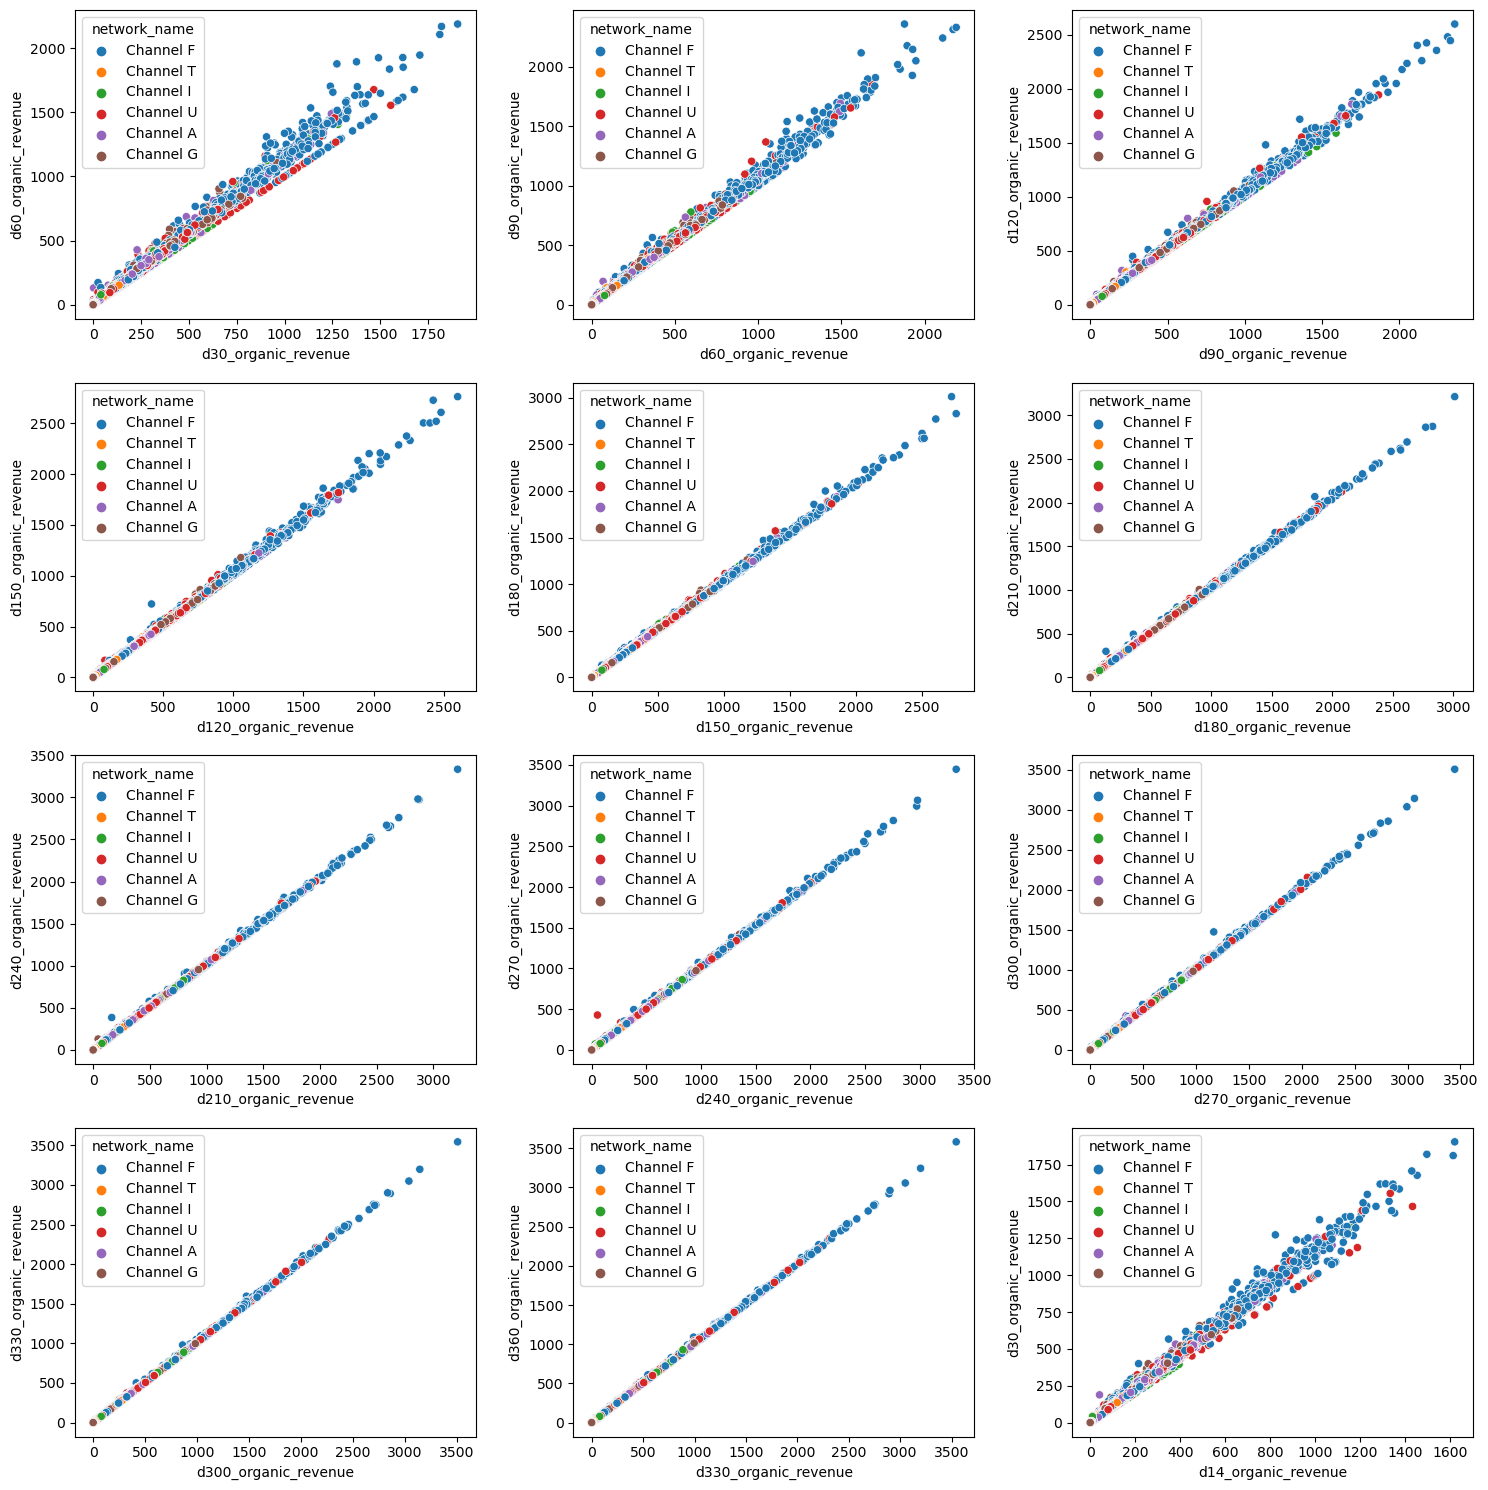

In [22]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15)) # Define a grid of 4x3 subplots
axs = axs.ravel() # Flatten the grid into a 1D array to easily iterate over

for i, c in enumerate(range(2, 14)): # Modify the range to fit 12 plots

  if i == 11:
    sns.scatterplot(data=data, x=f'd14_organic_revenue', y=f'd30_organic_revenue', hue='network_name', ax=axs[i]) 
  else:
    cohort = c * 30
    prev_cohort = (c - 1) * 30
    sns.scatterplot(data=data, y=f'd{cohort}_organic_revenue', x=f'd{prev_cohort}_organic_revenue', hue='network_name', ax=axs[i]) 

plt.tight_layout() # Improve appearance
plt.show() # Show the plot

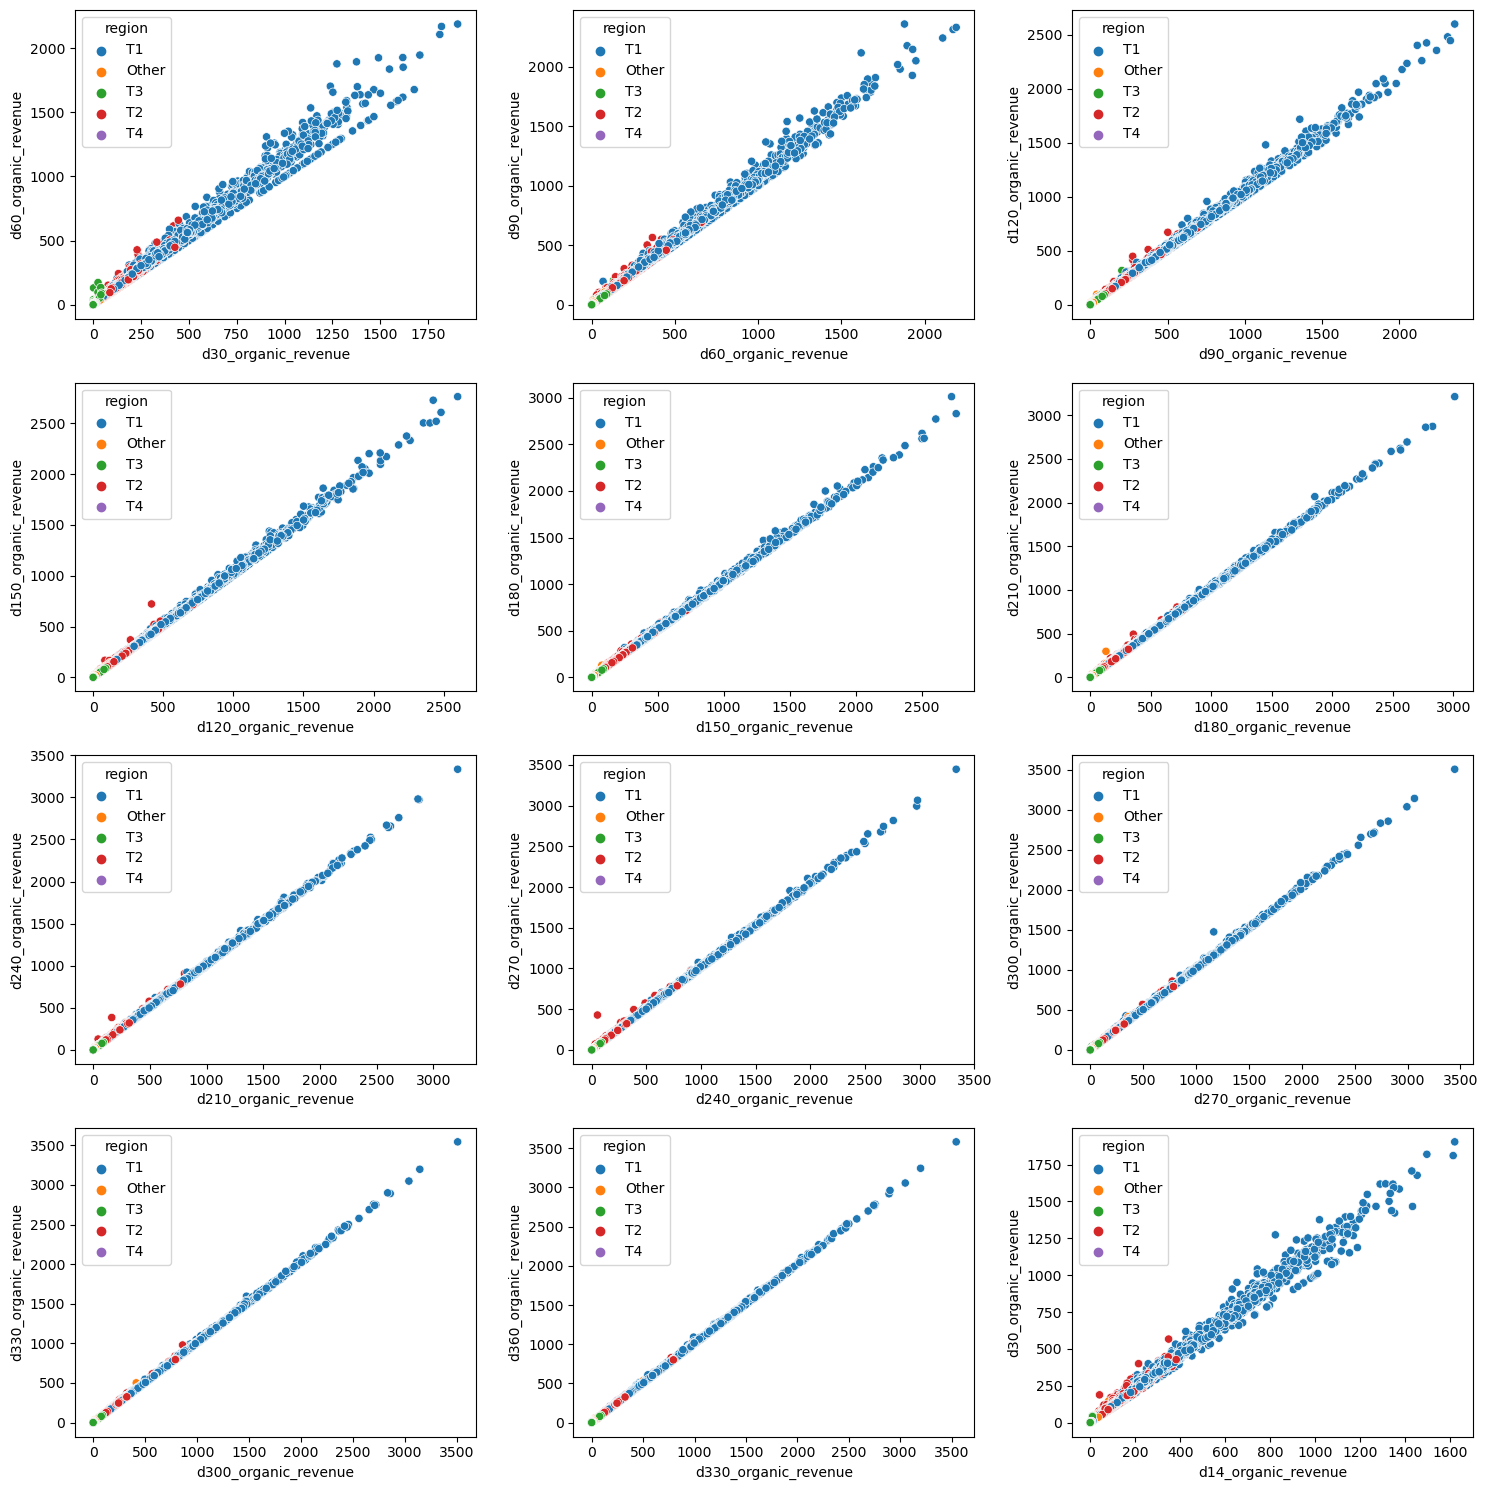

In [23]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15)) # Define a grid of 4x3 subplots
axs = axs.ravel() # Flatten the grid into a 1D array to easily iterate over

for i, c in enumerate(range(2, 14)): # Modify the range to fit 12 plots

  if i == 11:
    sns.scatterplot(data=data, x=f'd14_organic_revenue', y=f'd30_organic_revenue', hue='region', ax=axs[i]) 
  else:
    cohort = c * 30
    prev_cohort = (c - 1) * 30
    sns.scatterplot(data=data, y=f'd{cohort}_organic_revenue', x=f'd{prev_cohort}_organic_revenue', hue='region', ax=axs[i]) 

plt.tight_layout() # Improve appearance
plt.show() # Show the plot

Very similar correlations between the different cohorts. I think the same approach applies to the organic revenue predictions.

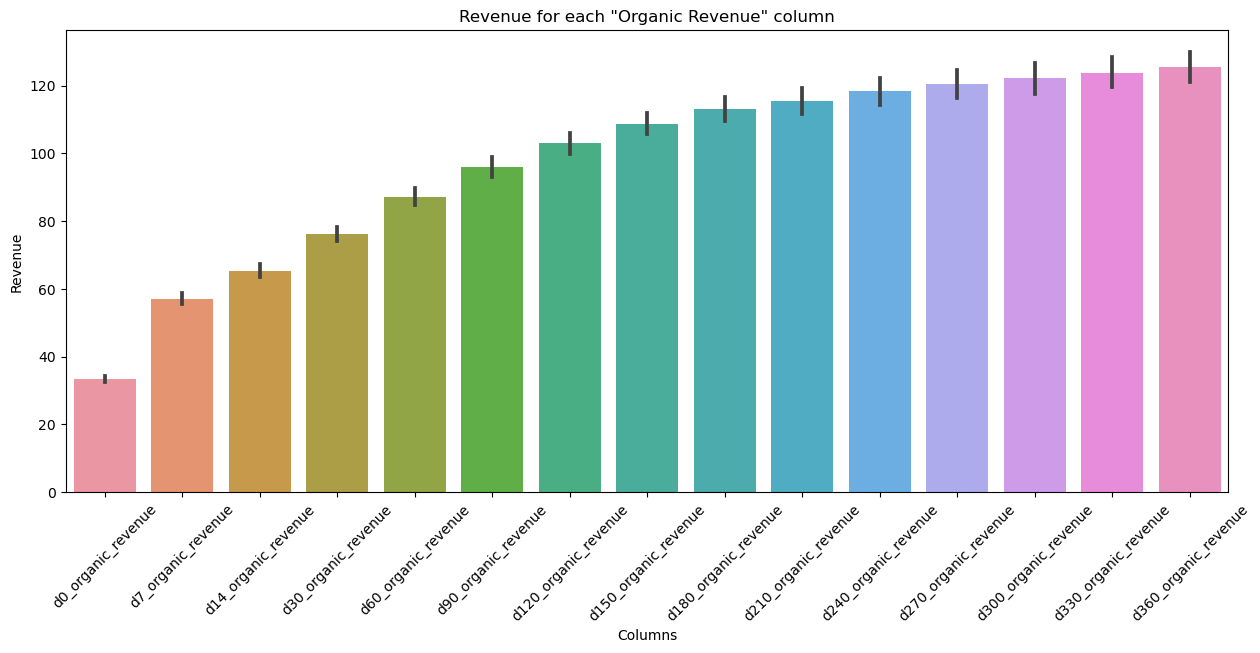

In [24]:
organic_rev_date = data[organic_revenue_columns]

# Reshape the DataFrame
organic_rev_date_melted = organic_rev_date.melt(var_name='Column', value_name='Revenue')

# Create the bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x='Column', y='Revenue', data=organic_rev_date_melted)
plt.title('Revenue for each "Organic Revenue" column')
plt.ylabel('Revenue')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()


### Modeling One More Time

In [25]:
cohorts = [7, 14, 30]

for c in range(2,13):
  cohort = c*30
  cohorts.append(cohort)
  
cohorts

[7, 14, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360]

Growth is an important metric used by subject-matter experts. It describes the increment in revenue from a given period to the next. In this case, we will use the growth of revenue from one cohort to the next. Those features will be added to the dataset.

In [26]:
growth_df = data.copy()

for i in range(len(cohorts)):
  
  if i > 0: 
    cohort = cohorts[i]
    prev_cohort = cohorts[i-1]
    growth_df[f'd{prev_cohort}_d{cohort}_paid_revenue'] = data[f'd{prev_cohort}_paid_revenue']/data[f'd{cohort}_paid_revenue']
    growth_df[f'd{prev_cohort}_d{cohort}_organic_revenue'] = data[f'd{prev_cohort}_organic_revenue']/data[f'd{cohort}_organic_revenue']


growth_df['date'] = pd.to_datetime(growth_df['date'])
growth_df['day_of_week'] = growth_df['date'].dt.dayofweek
growth_df['month'] = growth_df['date'].dt.month
growth_df['year'] = growth_df['date'].dt.year

growth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27328 entries, 0 to 27327
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       27328 non-null  datetime64[ns]
 1   sku                        27328 non-null  object        
 2   network_name               27328 non-null  object        
 3   region                     27328 non-null  object        
 4   spend                      26979 non-null  float64       
 5   d0_paid_revenue            26979 non-null  float64       
 6   d0_organic_revenue         26979 non-null  float64       
 7   d7_paid_revenue            26764 non-null  float64       
 8   d7_organic_revenue         26764 non-null  float64       
 9   d14_paid_revenue           26586 non-null  float64       
 10  d14_organic_revenue        26586 non-null  float64       
 11  d30_paid_revenue           26176 non-null  float64       
 12  d30_

In [27]:
dimension_cols = ['network_name','region']
time_dimension_cols = ['day_of_week'] # 'month', 'year'
buckets = ['paid', 'organic']

In [28]:
train_df = growth_df.copy()

train_datasets = {}

for b in buckets:
  for i in range(len(cohorts)):
    if i > 0: 
      cohort = cohorts[i]
      prev_cohort = cohorts[i-1]
      
      growth_col = f'd{prev_cohort}_d{cohort}_{b}_revenue'
      feature_col = f'd{prev_cohort}_{b}_revenue'
      label_col = f'd{cohort}_{b}_revenue'

      train_dataset = train_df[dimension_cols + time_dimension_cols + [growth_col, feature_col, label_col]].copy()
      print(f'd{cohort}_{b}_revenue length: {len(train_dataset)}')
      
      train_dataset.dropna(inplace=True)
      print(f'd{cohort}_{b}_revenue length (dropna): {len(train_dataset)}')
      
      train_datasets[f'd{cohort}_{b}_revenue'] = train_dataset
      

d14_paid_revenue length: 27328
d14_paid_revenue length (dropna): 18286
d30_paid_revenue length: 27328
d30_paid_revenue length (dropna): 17998
d60_paid_revenue length: 27328
d60_paid_revenue length (dropna): 17485
d90_paid_revenue length: 27328
d90_paid_revenue length (dropna): 17170
d120_paid_revenue length: 27328
d120_paid_revenue length (dropna): 16508
d150_paid_revenue length: 27328
d150_paid_revenue length (dropna): 15924
d180_paid_revenue length: 27328
d180_paid_revenue length (dropna): 15359
d210_paid_revenue length: 27328
d210_paid_revenue length (dropna): 14702
d240_paid_revenue length: 27328
d240_paid_revenue length (dropna): 14017
d270_paid_revenue length: 27328
d270_paid_revenue length (dropna): 13294
d300_paid_revenue length: 27328
d300_paid_revenue length (dropna): 12590
d330_paid_revenue length: 27328
d330_paid_revenue length (dropna): 11902
d360_paid_revenue length: 27328


d360_paid_revenue length (dropna): 11205
d14_organic_revenue length: 27328
d14_organic_revenue length (dropna): 26350
d30_organic_revenue length: 27328
d30_organic_revenue length (dropna): 25871
d60_organic_revenue length: 27328
d60_organic_revenue length (dropna): 24971
d90_organic_revenue length: 27328
d90_organic_revenue length (dropna): 24071
d120_organic_revenue length: 27328
d120_organic_revenue length (dropna): 23177
d150_organic_revenue length: 27328
d150_organic_revenue length (dropna): 22281
d180_organic_revenue length: 27328
d180_organic_revenue length (dropna): 21382
d210_organic_revenue length: 27328
d210_organic_revenue length (dropna): 20483
d240_organic_revenue length: 27328
d240_organic_revenue length (dropna): 19583
d270_organic_revenue length: 27328
d270_organic_revenue length (dropna): 18684
d300_organic_revenue length: 27328
d300_organic_revenue length (dropna): 17789
d330_organic_revenue length: 27328
d330_organic_revenue length (dropna): 16889
d360_organic_revenu

I'm going to be using the following features to train the model:

Categorical features:
- network_name
- region

Time dimension features (taken from the date feature)
- day_of_week
- month
- year

revenue-related features (paid or organic):

- D14 organic/paid model will use the D7 organic/paid revenue feature
- D30 organic/paid model will use the D14 organic/paid revenue feature
- D60 organic/paid model will use the D30 organic/paid revenue feature
...
- D360 organic/paid model will use the D330 organic/paid revenue feature

In [29]:
models = []
scores = []
rmses = []
maes = []
rounds = []
regressors_1 = {}
coefs_1 = []

for b in buckets:
  for i in range(len(cohorts)):
    if i > 0: 
      cohort = cohorts[i]
      prev_cohort = cohorts[i-1]
      
      train_dataset = f'd{cohort}_{b}_revenue'
      
      label_col = f'd{cohort}_{b}_revenue'
      feature_col = f'd{prev_cohort}_{b}_revenue'

      X = train_datasets[f'd{cohort}_{b}_revenue'][dimension_cols + time_dimension_cols + [feature_col]]
      y = train_datasets[f'd{cohort}_{b}_revenue'][[label_col]]
      
      # One-Hot Encoding for dimension_cols
      X = pd.get_dummies(X, columns=dimension_cols)
      
      # print(f'fitting d{cohort}_{b} with {len(X)} records...')
      
      # Split the data into a training set and a test set
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

      # Define the parameter grid to search over
      param_grid = {
          'fit_intercept': [True, False]
      }
      
      # Create a GridSearchCV instance
      grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_root_mean_squared_error')
      
      # Train the model
      grid_search.fit(X_train, y_train)

      # Get the best model
      best_model = grid_search.best_estimator_

      # Make predictions on the test set
      y_pred = best_model.predict(X_test)

      # Calculate the root mean squared error and the mean absolute error
      rmse = mean_squared_error(y_test, y_pred)
      mae = mean_absolute_error(y_test, y_pred)
      score = best_model.score(X_test, y_test)

      coefficients_ = pd.DataFrame({
          'Feature': X_test.columns,
          'Coefficient': best_model.coef_[0]
      }).sort_values(by='Coefficient', ascending=False)


      print(f'd{cohort}_{b} coefficients:\n{coefficients_}')
      print(f'*' * 50)
      print(f'\n')

      models.append(f'd{cohort}_{b}_revenue')
      scores.append(score)
      rmses.append(rmse)
      maes.append(mae)
      rounds.append('first')
      
      regressors_1[f'd{cohort}_{b}'] = best_model

model_results_1 = pd.DataFrame({

  "models": models,
  "scores": scores,
  "rmses": rmses,
  "maes": maes,
  # "coefs": coefs_1,
  "rounds": rounds
})

model_results_1

d14_paid coefficients:
                   Feature  Coefficient
7   network_name_Channel U    10.298864
9                region_T1     7.996063
2   network_name_Channel A     5.715932
4   network_name_Channel G     5.193196
5   network_name_Channel I     2.882823
12               region_T4     1.334233
1          d7_paid_revenue     1.127727
11               region_T3    -0.450995
0              day_of_week    -0.499819
8             region_Other    -1.827926
10               region_T2    -7.051375
3   network_name_Channel F   -11.428463
6   network_name_Channel T   -12.662353
**************************************************


d30_paid coefficients:
                   Feature  Coefficient
7   network_name_Channel U    16.547968
9                region_T1    11.842432
4   network_name_Channel G     9.534628
2   network_name_Channel A     7.283317
5   network_name_Channel I     4.884870
12               region_T4     4.264107
11               region_T3     2.106961
1         d14_paid_re

models    scores        rmses       maes rounds
0       d14_paid_revenue  0.999183  1447.316279  19.448579  first
1       d30_paid_revenue  0.998751  2520.384545  25.112896  first
2       d60_paid_revenue  0.998828  3199.729601  28.027670  first
3       d90_paid_revenue  0.999485  1443.888809  17.450055  first
4      d120_paid_revenue  0.999713   899.318855  14.109817  first
5      d150_paid_revenue  0.999770   812.549250  12.105133  first
6      d180_paid_revenue  0.999860   524.315807  10.519532  first
7      d210_paid_revenue  0.999889   421.546783   9.303858  first
8      d240_paid_revenue  0.999918   296.605511   8.001690  first
9      d270_paid_revenue  0.999929   277.758091   7.569411  first
10     d300_paid_revenue  0.999911   336.205726   6.722574  first
11     d330_paid_revenue  0.999922   273.756292   5.836808  first
12     d360_paid_revenue  0.999955   165.588470   5.576994  first
13   d14_organic_revenue  0.998505    37.417312   2.032803  first
14   d30_organic_revenue  0.996915   102.652189   2.971355  first
15   d60_organic_revenue  0.995016   221.335873   4.335589  first
16   d90_organic_revenue  0.998360    80.767632   2.862150  first
17  d120_organic_revenue  0.999133    48.616001   2.178950  first
18  d150_organic_revenue  0.999485    33.500831   1.821002  first
19  d180_organic_revenue  0.999540    32.849520   1.631508  first
20  d210_organic_revenue  0.999705    23.528964   1.442605  first
21  d240_organic_revenue  0.999689    25.051551   1.270117  first
22  d270_organic_revenue  0.999550    40.169697   1.163261  first
23  d300_organic_revenue  0.999882    11.071541   1.059835  first
24  d330_organic_revenue  0.999855    13.943012   0.970327  first
25  d360_organic_revenue  0.999927     6.955800   0.885913  first

*The models' scores are very good. The data patterns describe almost a perfect diagonal in most of the cases which explains the high scores. Having said that, is important to take into consideration that the output of one model is the input of the next one(input never "seen" by the models). This is a very important point to take into consideration when evaluating the models' performance.*

### Analyzing growth

*When talking to subject-matter experts, they felt uncomfortable with the idea of removing the data causing the skewness in most of the features. They mentioned that the definition of "outlier" should be thought in terms of the growth of revenue over time and not as a univariate analysis. In other words, the revenue performance on a given cohort should be compared to the revenue performance in previous dates. If the revenue growth of the cohort is much higher (or lower) than the previous cohorts, then it is considered an outlier. This is a more reasonable definition of "outlier" in this context.*

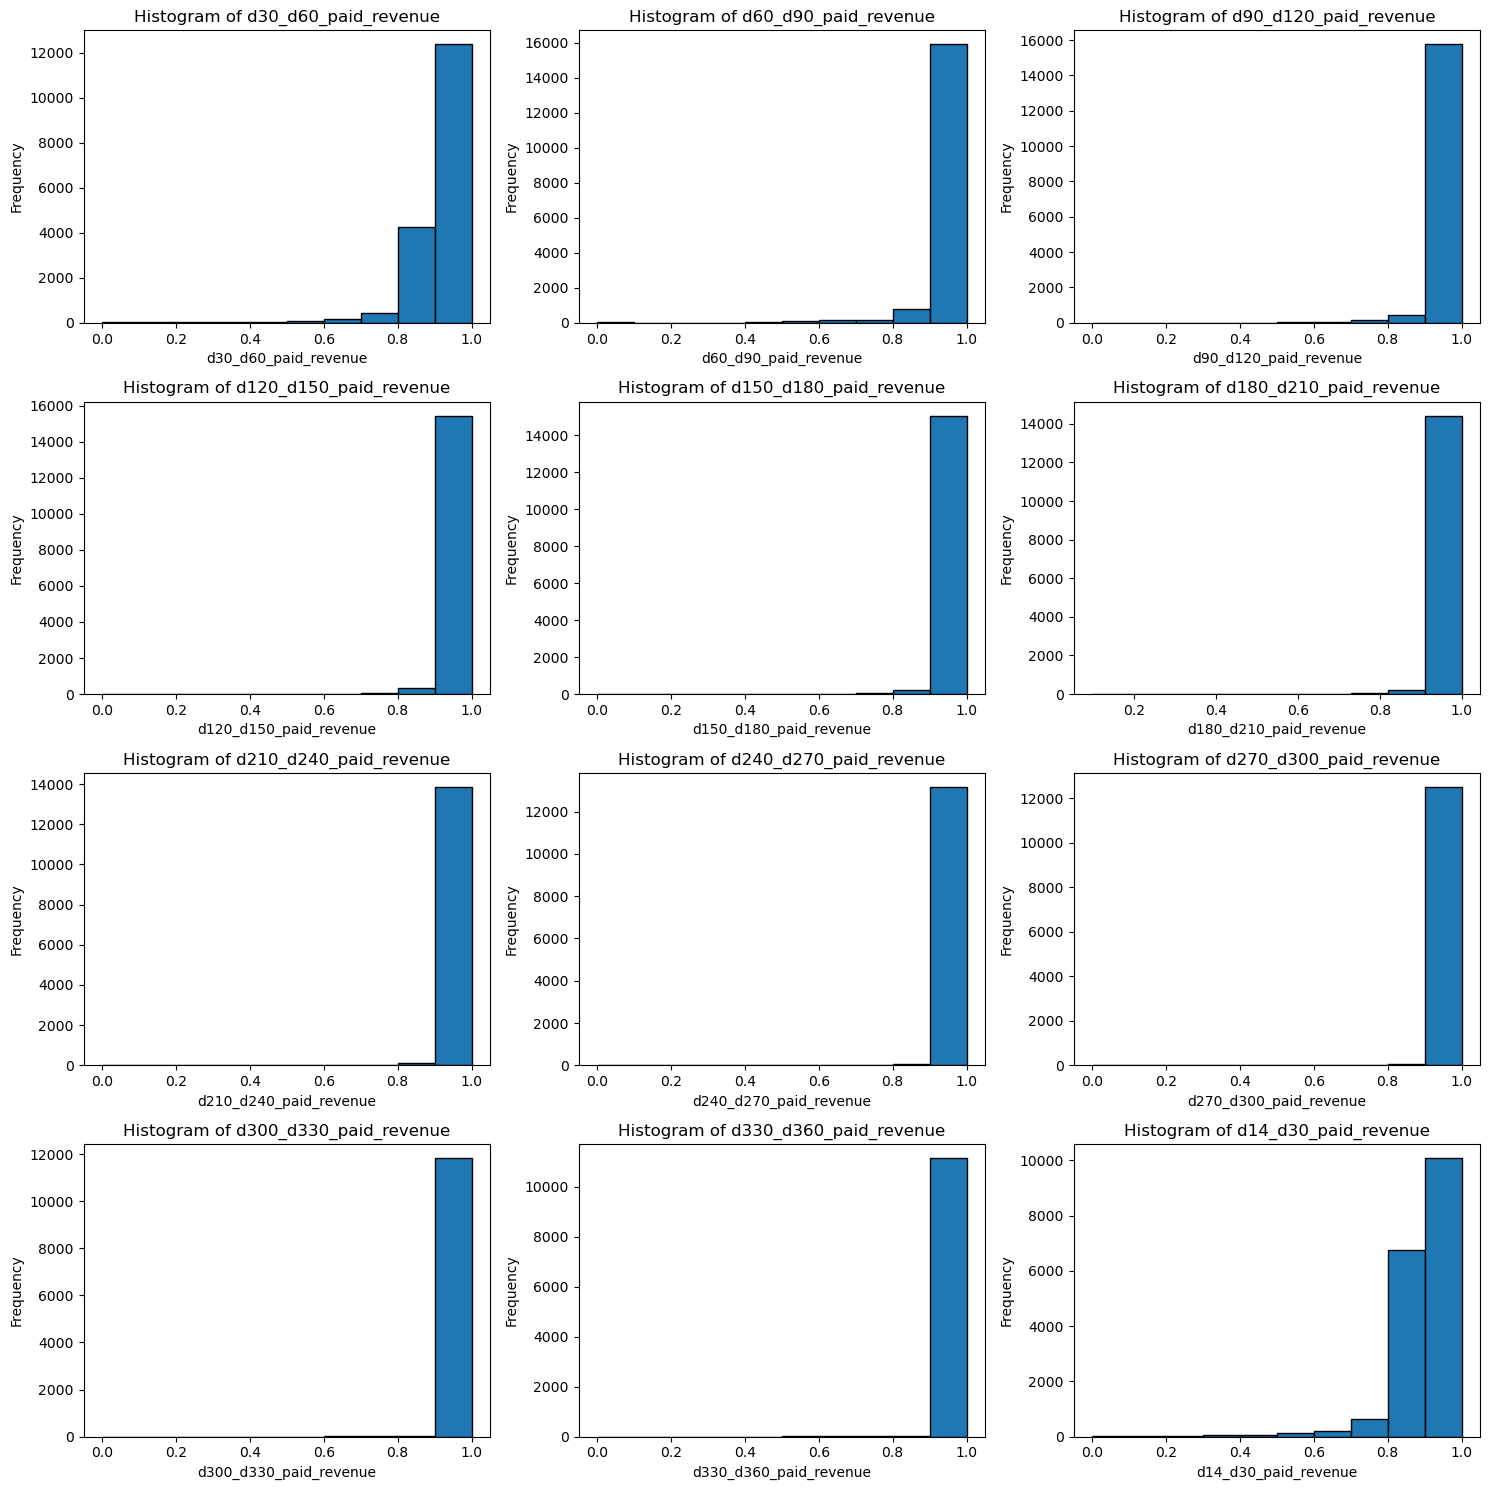

In [30]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15)) # Define a grid of 4x3 subplots
axs = axs.ravel() # Flatten the grid into a 1D array to easily iterate over

for i, c in enumerate(range(2, 14)): # Modify the range to fit 12 plots
  if i == 11:
    axs[i].hist(train_datasets['d30_paid_revenue']['d14_d30_paid_revenue'], edgecolor='black')
    axs[i].set_xlabel('d14_d30_paid_revenue')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title('Histogram of d14_d30_paid_revenue')
  else:
    cohort = c * 30
    prev_cohort = (c - 1) * 30
    
    axs[i].hist(train_datasets[f'd{cohort}_paid_revenue'][f'd{prev_cohort}_d{cohort}_paid_revenue'], edgecolor='black')
    axs[i].set_xlabel(f'd{prev_cohort}_d{cohort}_paid_revenue')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of d{prev_cohort}_d{cohort}_paid_revenue')

plt.tight_layout() # Improve appearance
plt.show() # Show the plot


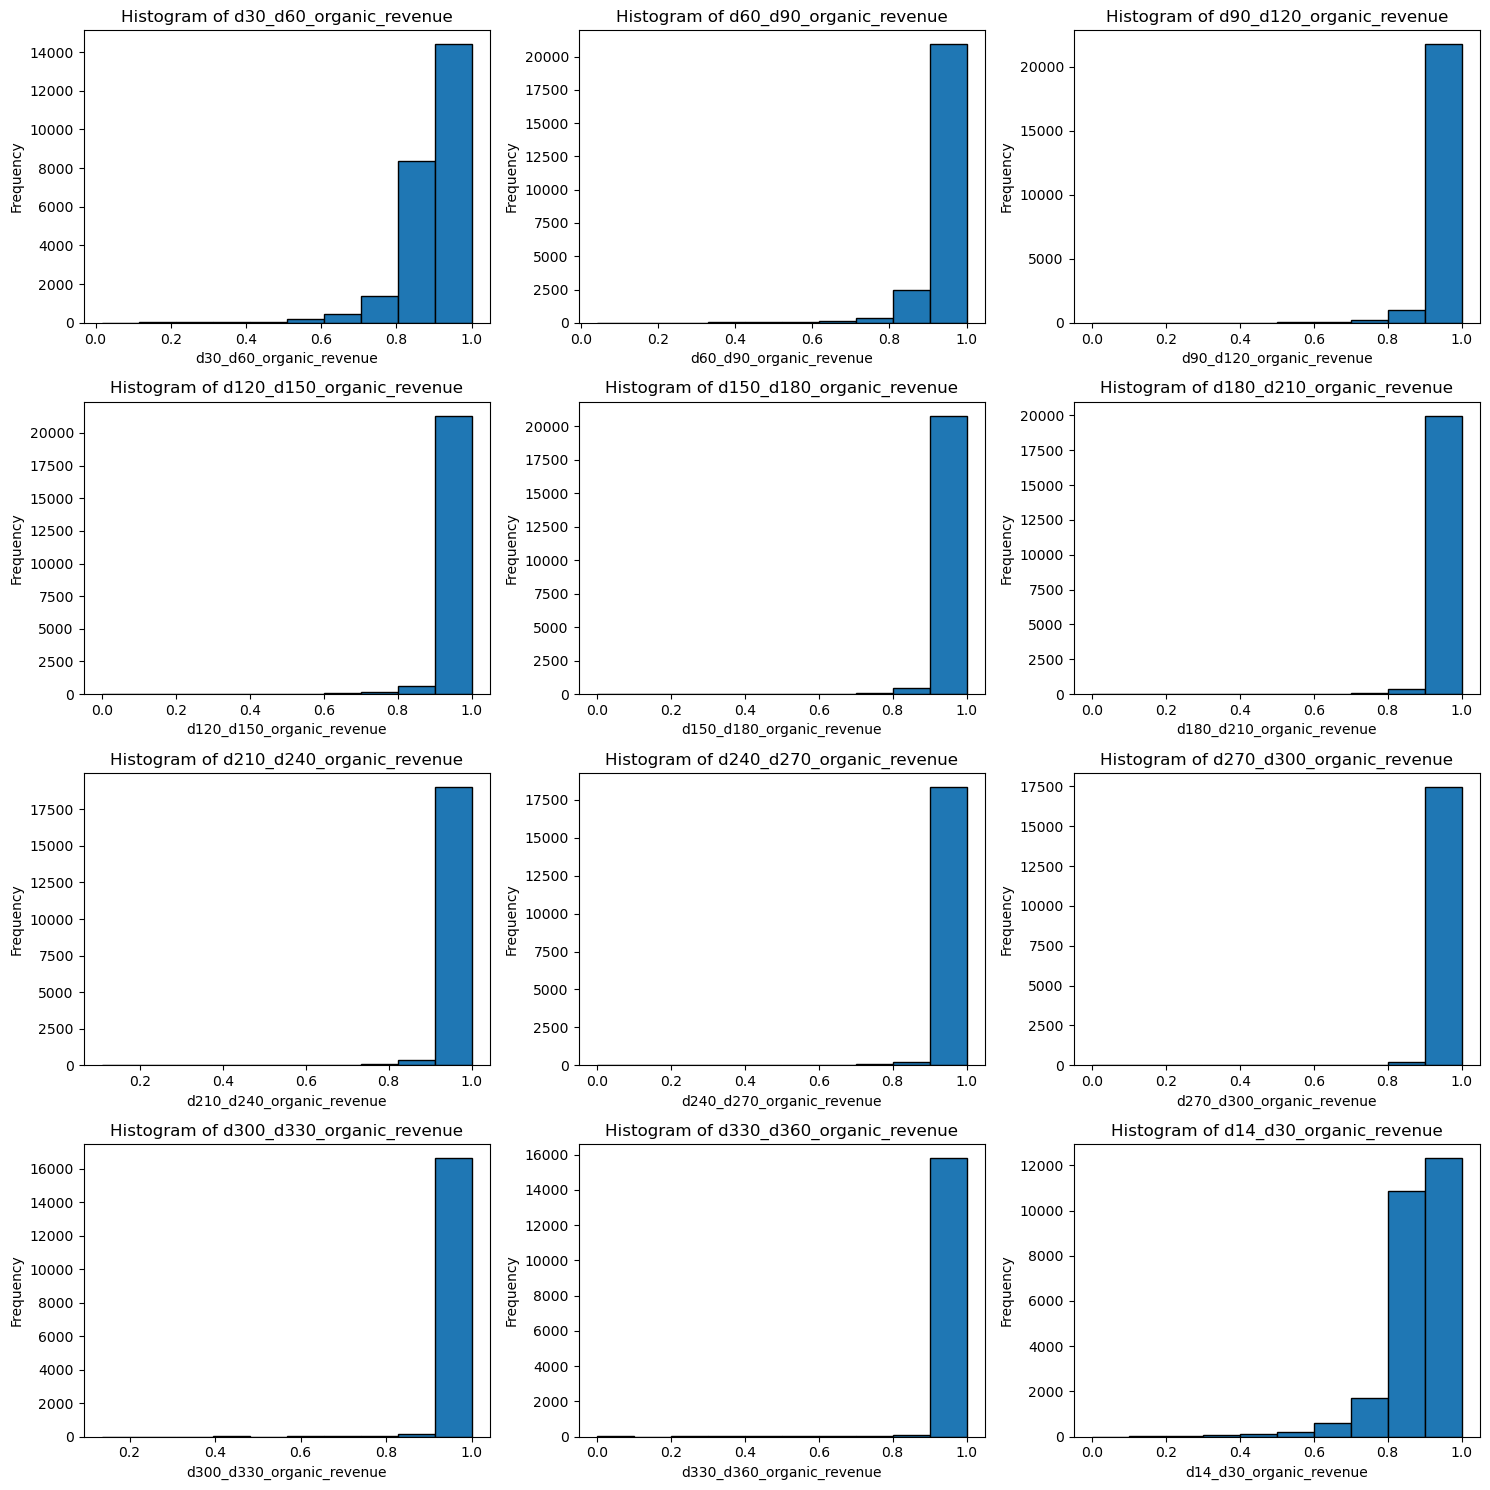

In [31]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15)) # Define a grid of 4x3 subplots
axs = axs.ravel() # Flatten the grid into a 1D array to easily iterate over

for i, c in enumerate(range(2, 14)): # Modify the range to fit 12 plots
  if i == 11:
    axs[i].hist(train_datasets['d30_organic_revenue']['d14_d30_organic_revenue'], edgecolor='black')
    axs[i].set_xlabel('d14_d30_organic_revenue')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title('Histogram of d14_d30_organic_revenue')
  else:
    cohort = c * 30
    prev_cohort = (c - 1) * 30
    
    axs[i].hist(train_datasets[f'd{cohort}_organic_revenue'][f'd{prev_cohort}_d{cohort}_organic_revenue'], edgecolor='black')
    axs[i].set_xlabel(f'd{prev_cohort}_d{cohort}_organic_revenue')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of d{prev_cohort}_d{cohort}_organic_revenue')

plt.tight_layout() # Improve appearance
plt.show() # Show the plot


### Removing growth coeficient outliers

Since we have a lot of models to optimize, a couple of functions will be created to identify/remove outliers programmatically instead of going through each model manually. A Interquartile Range (IQR) is computed as the difference between Q3 and Q1. Data points below the `lower_bound` or above the `upper_bound` are considered potential outliers. Those boundaries are computed as follows:

```
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
```


In [32]:
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the range for valid observations
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    # Identify the outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers
    
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the range for valid observations
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    # Select only the rows with valid values
    no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return no_outliers

Applying the functions to the different datasets

In [33]:
for b in buckets:
  for i in range(len(cohorts)):
    if i > 0: 
      cohort = cohorts[i]
      prev_cohort = cohorts[i-1]
      
      growth_col = f'd{prev_cohort}_d{cohort}_{b}_revenue'
      
      train_dataset = train_datasets[f'd{cohort}_{b}_revenue']
      print(f'd{cohort}_{b}_revenue length: {len(train_dataset)}')
      
      train_dataset = remove_outliers(train_dataset, growth_col)
      print(f'd{cohort}_{b}_revenue length (w/o outliers): {len(train_dataset)}\n')
      
      train_datasets[f'd{cohort}_{b}_revenue'] = train_dataset



d14_paid_revenue length: 18286
d14_paid_revenue length (w/o outliers): 17580

d30_paid_revenue length: 17998
d30_paid_revenue length (w/o outliers): 17448

d60_paid_revenue length: 17485
d60_paid_revenue length (w/o outliers): 16952

d90_paid_revenue length: 17170
d90_paid_revenue length (w/o outliers): 16441

d120_paid_revenue length: 16508
d120_paid_revenue length (w/o outliers): 15727

d150_paid_revenue length: 15924
d150_paid_revenue length (w/o outliers): 15150

d180_paid_revenue length: 15359
d180_paid_revenue length (w/o outliers): 14601

d210_paid_revenue length: 14702
d210_paid_revenue length (w/o outliers): 13873

d240_paid_revenue length: 14017
d240_paid_revenue length (w/o outliers): 13184

d270_paid_revenue length: 13294
d270_paid_revenue length (w/o outliers): 12472

d300_paid_revenue length: 12590
d300_paid_revenue length (w/o outliers): 11755

d330_paid_revenue length: 11902
d330_paid_revenue length (w/o outliers): 11091

d360_paid_revenue length: 11205
d360_paid_revenu

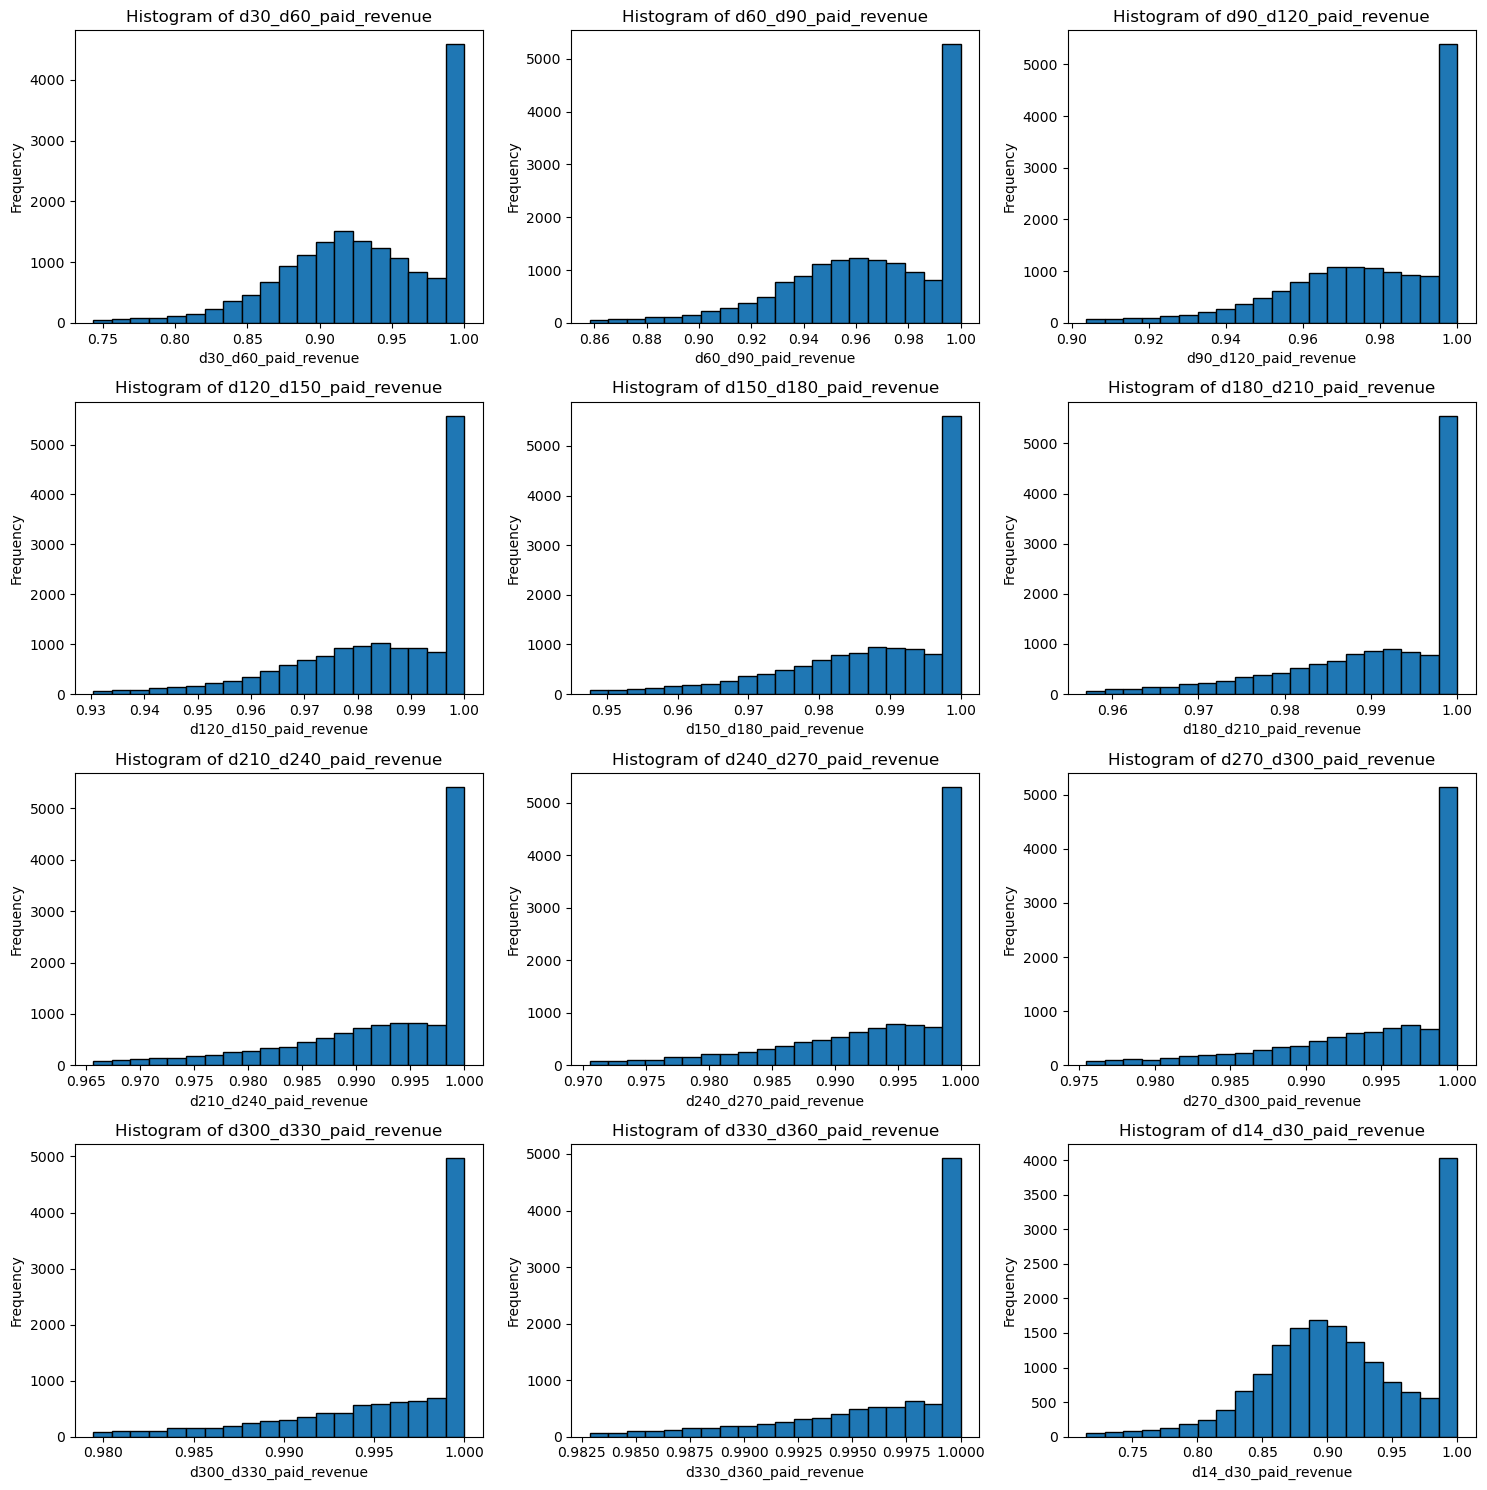

In [34]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15)) # Define a grid of 4x3 subplots
axs = axs.ravel() # Flatten the grid into a 1D array to easily iterate over

for i, c in enumerate(range(2, 14)): # Modify the range to fit 12 plots
  if i == 11:
    axs[i].hist(train_datasets['d30_paid_revenue']['d14_d30_paid_revenue'], bins=20, edgecolor='black')
    axs[i].set_xlabel('d14_d30_paid_revenue')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title('Histogram of d14_d30_paid_revenue')
  else:
    cohort = c * 30
    prev_cohort = (c - 1) * 30
    
    axs[i].hist(train_datasets[f'd{cohort}_paid_revenue'][f'd{prev_cohort}_d{cohort}_paid_revenue'], bins=20, edgecolor='black')
    axs[i].set_xlabel(f'd{prev_cohort}_d{cohort}_paid_revenue')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of d{prev_cohort}_d{cohort}_paid_revenue')

plt.tight_layout() # Improve appearance
plt.show() # Show the plot


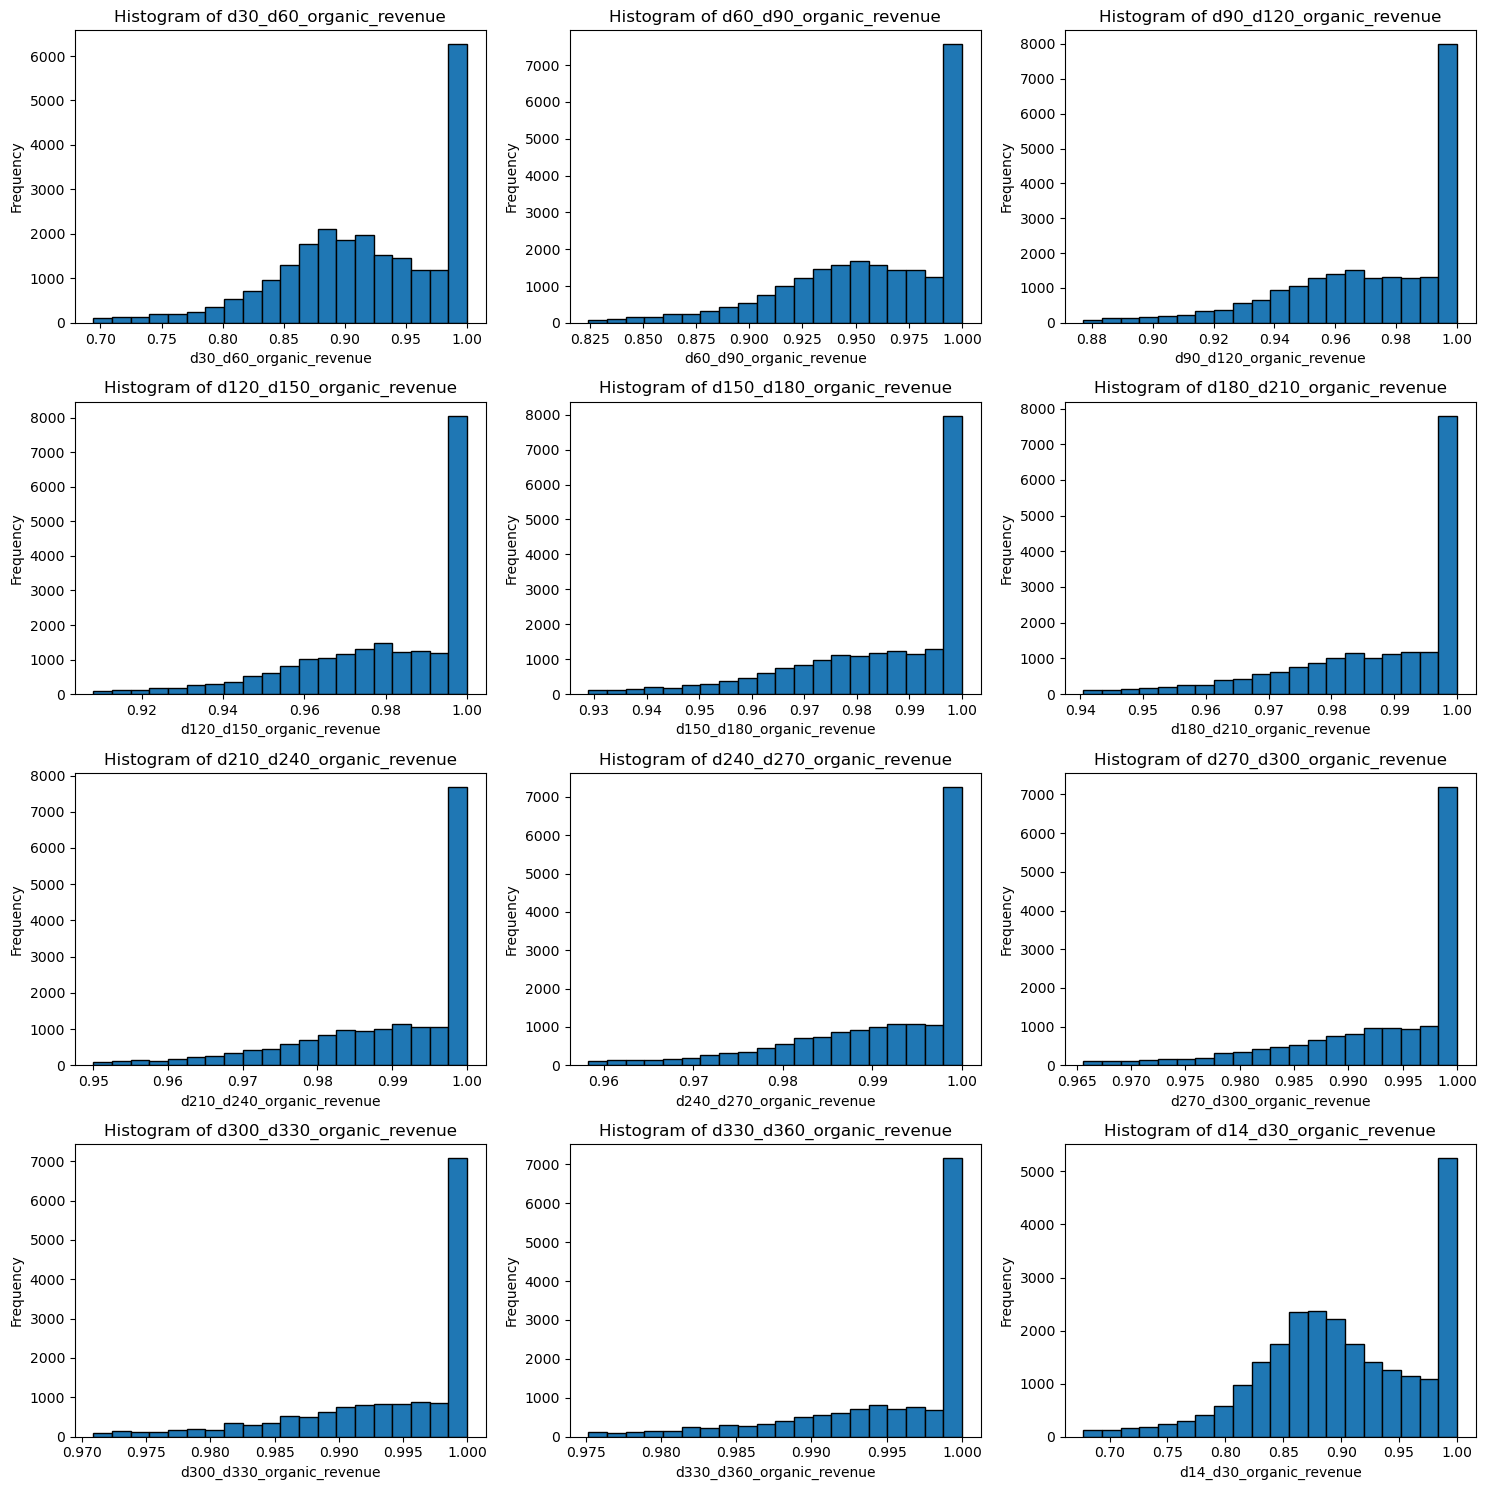

In [35]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15)) # Define a grid of 4x3 subplots
axs = axs.ravel() # Flatten the grid into a 1D array to easily iterate over

for i, c in enumerate(range(2, 14)): # Modify the range to fit 12 plots
  if i == 11:
    axs[i].hist(train_datasets['d30_organic_revenue']['d14_d30_organic_revenue'], bins=20, edgecolor='black')
    axs[i].set_xlabel('d14_d30_organic_revenue')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title('Histogram of d14_d30_organic_revenue')
  else:
    cohort = c * 30
    prev_cohort = (c - 1) * 30
    
    axs[i].hist(train_datasets[f'd{cohort}_organic_revenue'][f'd{prev_cohort}_d{cohort}_organic_revenue'], bins=20, edgecolor='black')
    axs[i].set_xlabel(f'd{prev_cohort}_d{cohort}_organic_revenue')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of d{prev_cohort}_d{cohort}_organic_revenue')

plt.tight_layout() # Improve appearance
plt.show() # Show the plot


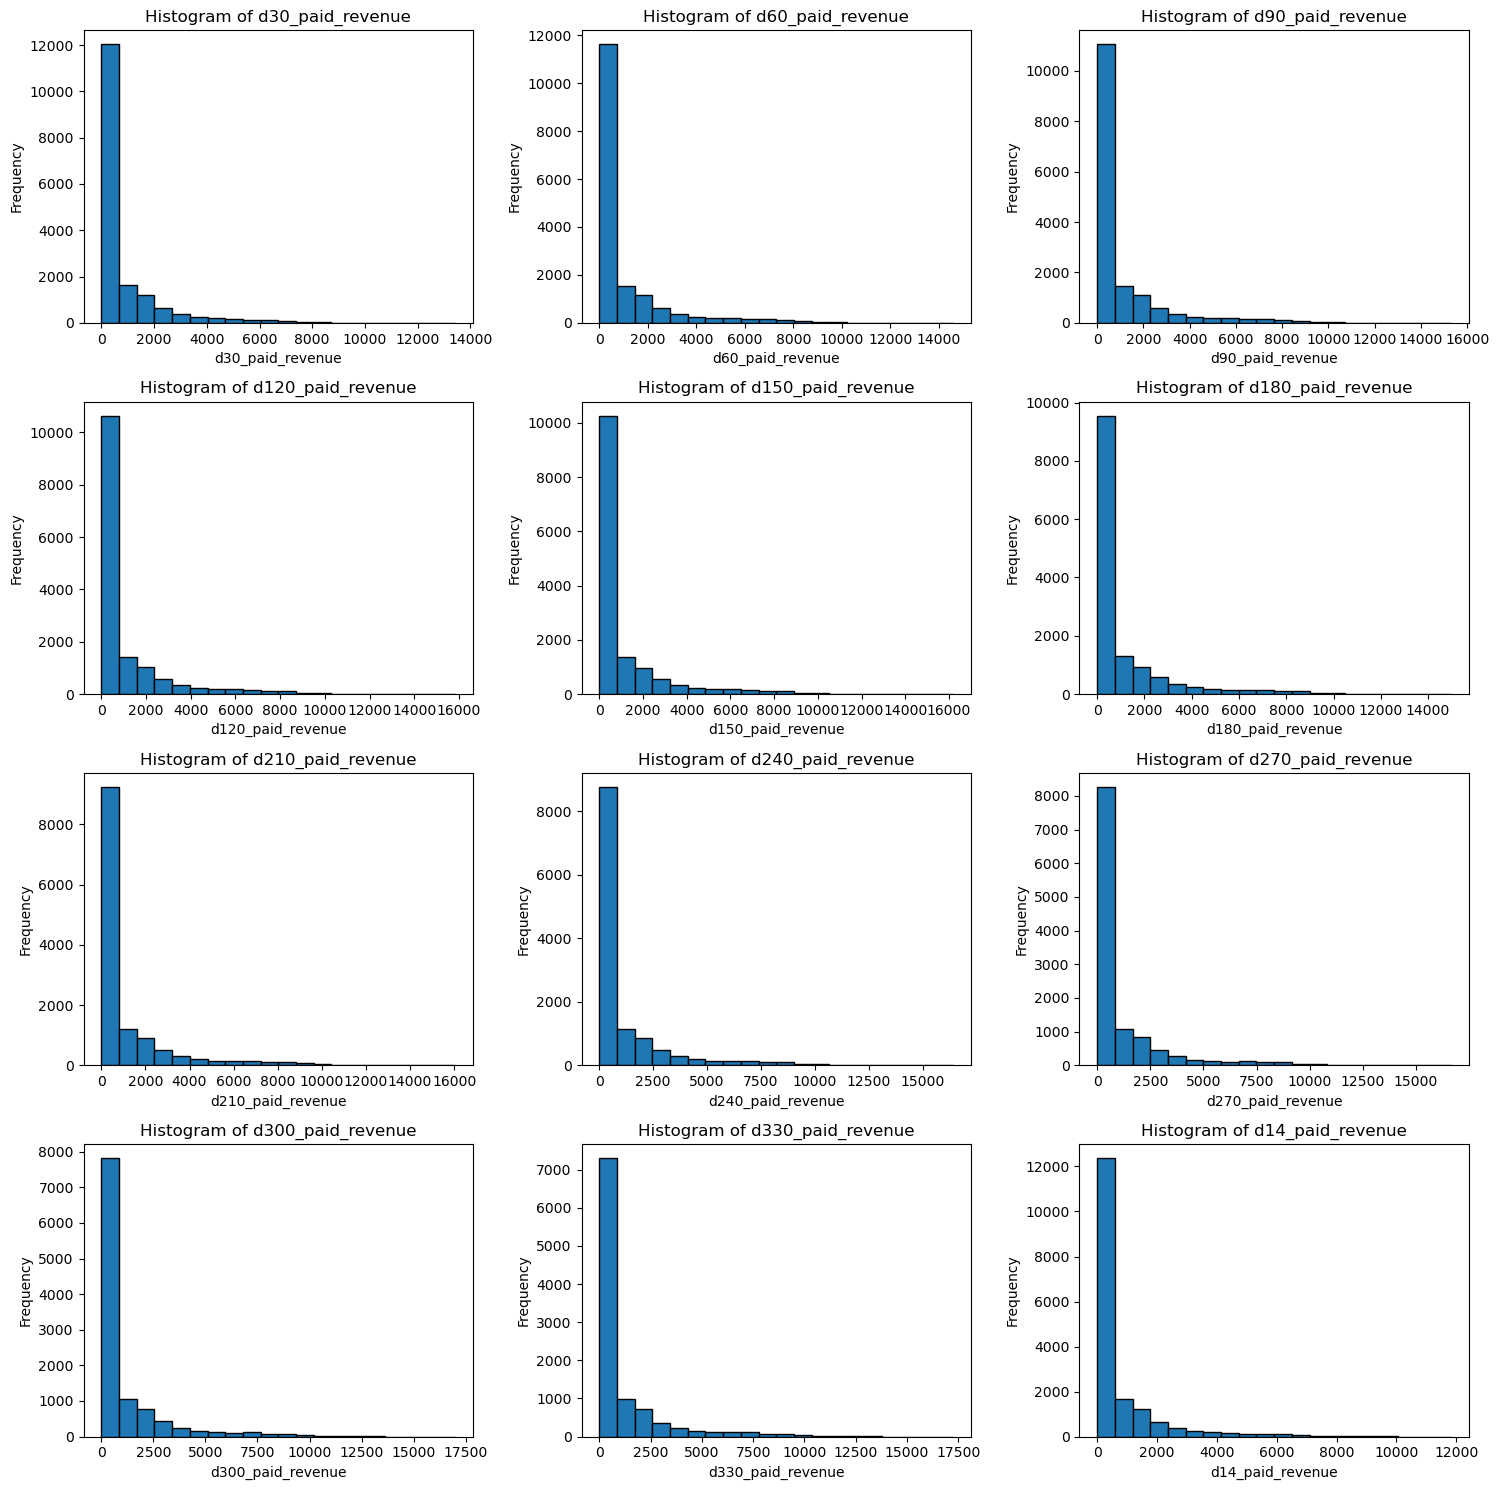

In [36]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15)) # Define a grid of 4x3 subplots
axs = axs.ravel() # Flatten the grid into a 1D array to easily iterate over

for i, c in enumerate(range(2, 14)): # Modify the range to fit 12 plots
  if i == 11:
    axs[i].hist(train_datasets['d30_paid_revenue']['d14_paid_revenue'], bins=20, edgecolor='black')
    axs[i].set_xlabel('d14_paid_revenue')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title('Histogram of d14_paid_revenue')
  else:
    cohort = c * 30
    prev_cohort = (c - 1) * 30
    
    axs[i].hist(train_datasets[f'd{cohort}_paid_revenue'][f'd{prev_cohort}_paid_revenue'], bins=20, edgecolor='black')
    axs[i].set_xlabel(f'd{prev_cohort}_paid_revenue')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of d{prev_cohort}_paid_revenue')

plt.tight_layout() # Improve appearance
plt.show() # Show the plot


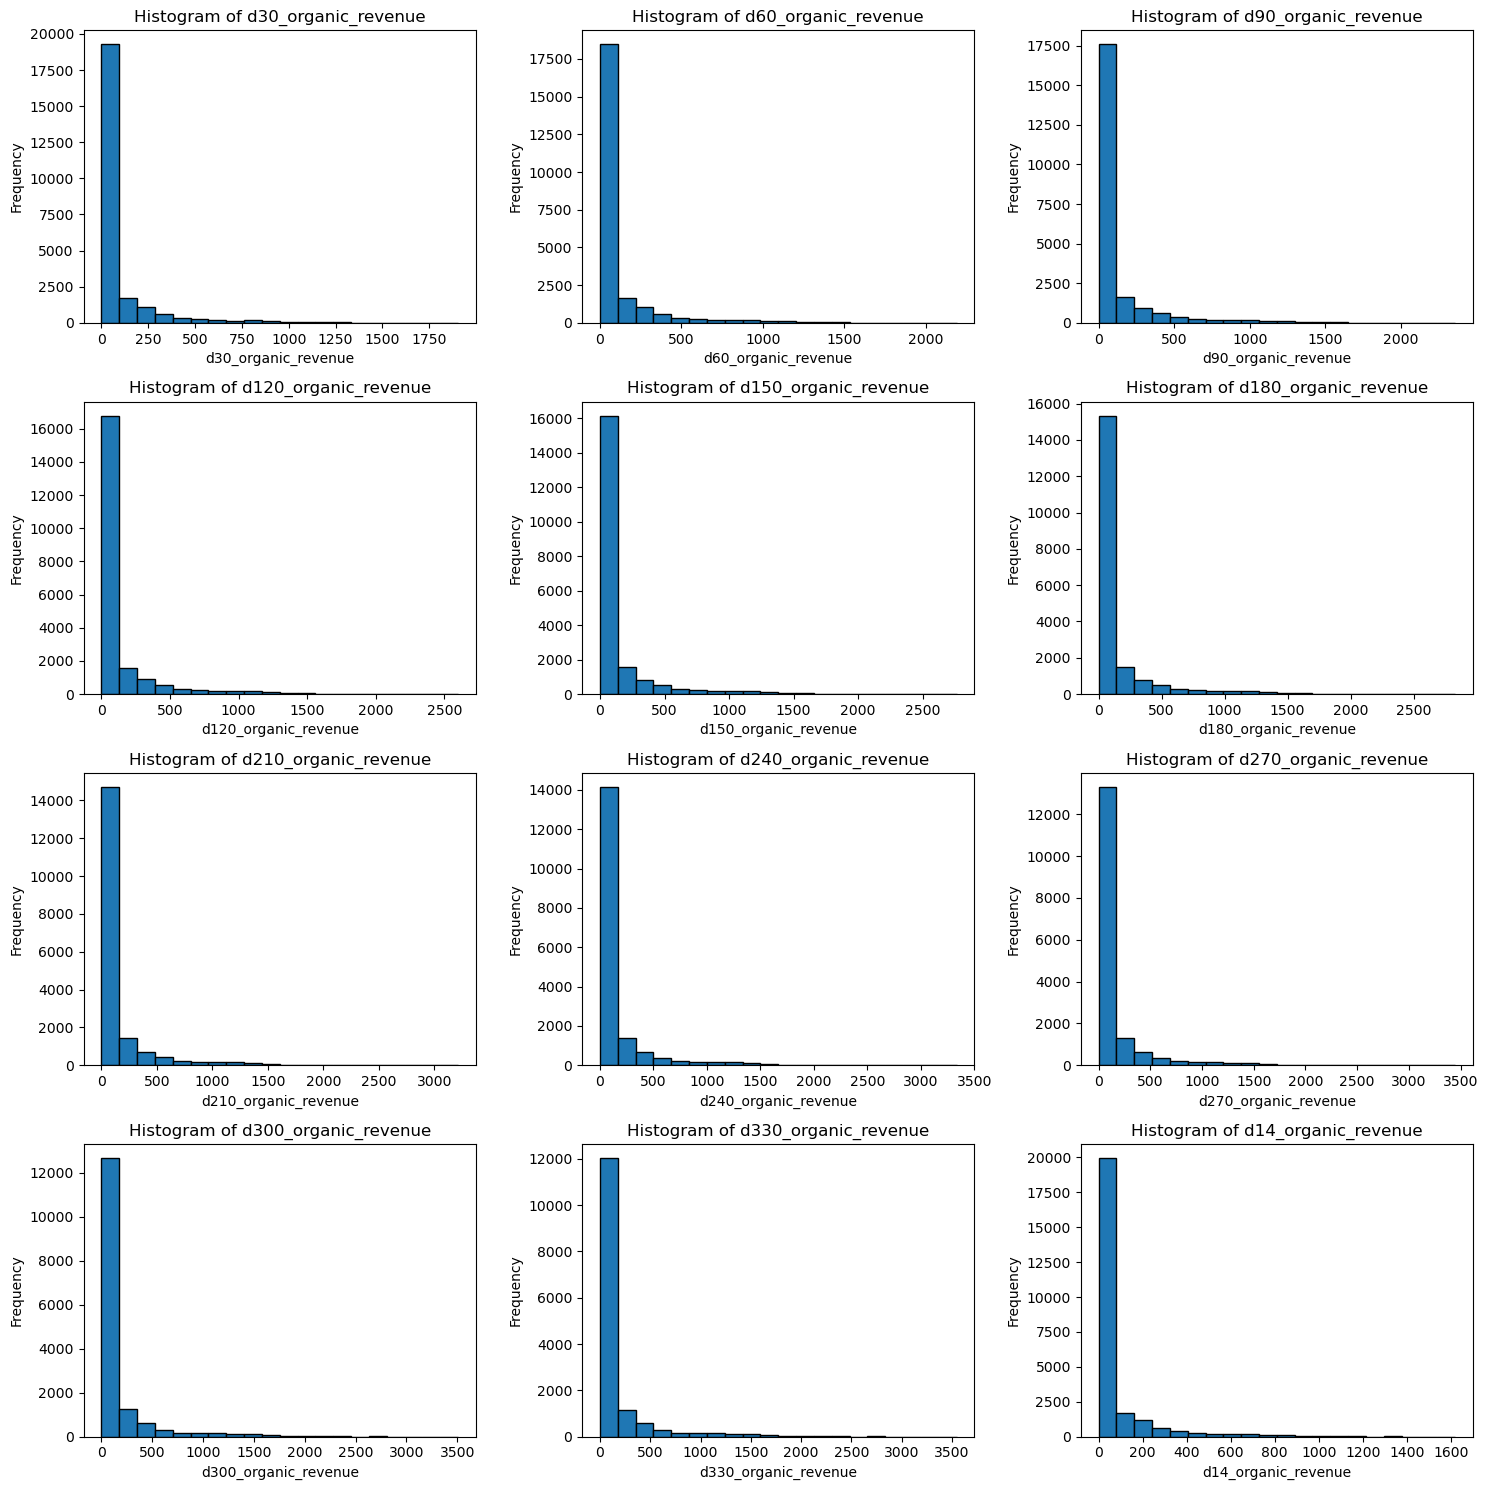

In [37]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15)) # Define a grid of 4x3 subplots
axs = axs.ravel() # Flatten the grid into a 1D array to easily iterate over

for i, c in enumerate(range(2, 14)): # Modify the range to fit 12 plots
  if i == 11:
    axs[i].hist(train_datasets['d30_organic_revenue']['d14_organic_revenue'], bins=20, edgecolor='black')
    axs[i].set_xlabel('d14_organic_revenue')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title('Histogram of d14_organic_revenue')
  else:
    cohort = c * 30
    prev_cohort = (c - 1) * 30
    
    axs[i].hist(train_datasets[f'd{cohort}_organic_revenue'][f'd{prev_cohort}_organic_revenue'], bins=20, edgecolor='black')
    axs[i].set_xlabel(f'd{prev_cohort}_organic_revenue')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of d{prev_cohort}_organic_revenue')

plt.tight_layout() # Improve appearance
plt.show() # Show the plot


### Fitting models (w/o growth outliers and duplicates)

In [38]:
models = []
scores = []
rmses = []
maes = []
rounds = []
regressors_2 = {}

for b in buckets:
  for i in range(len(cohorts)):
    if i > 0: 
      cohort = cohorts[i]
      prev_cohort = cohorts[i-1]
      
      train_dataset = f'd{cohort}_{b}_revenue'
      
      label_col = f'd{cohort}_{b}_revenue'
      feature_col = f'd{prev_cohort}_{b}_revenue'

      train_datasets[f'd{cohort}_{b}_revenue'] = train_datasets[f'd{cohort}_{b}_revenue'].drop_duplicates()

      X = train_datasets[f'd{cohort}_{b}_revenue'][dimension_cols + time_dimension_cols + [feature_col]]
      y = train_datasets[f'd{cohort}_{b}_revenue'][[label_col]]
      
      # One-Hot Encoding for dimension_cols
      X = pd.get_dummies(X, columns=dimension_cols)
      
      # print(f'fitting d{cohort}_{b} with {len(X)} records (w/o outliers)...')
      
      # Split the data into a training set and a test set
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

      # Define the parameter grid to search over
      param_grid = {
          'fit_intercept': [True, False]
      }
      
      # Create a GridSearchCV instance
      grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_root_mean_squared_error')
      
      # Train the model
      grid_search.fit(X_train, y_train)

      # Get the best model
      best_model = grid_search.best_estimator_

      # Make predictions on the test set
      y_pred = best_model.predict(X_test)

      # Calculate the root mean squared error and the mean absolute error
      rmse = mean_squared_error(y_test, y_pred)
      mae = mean_absolute_error(y_test, y_pred)
      score = best_model.score(X_test, y_test)
      
      models.append(f'd{cohort}_{b}_revenue')
      scores.append(score)
      rmses.append(rmse)
      maes.append(mae)
      rounds.append('second')
      
      regressors_2[f'd{cohort}_{b}'] = best_model

model_results_2 = pd.DataFrame({
  "models": models,
  "scores": scores,
  "rmses": rmses,
  "maes": maes,
  "rounds": rounds
})

model_results_2

models    scores        rmses       maes  rounds
0       d14_paid_revenue  0.999150  1488.806806  19.343288  second
1       d30_paid_revenue  0.998765  2718.935400  26.253889  second
2       d60_paid_revenue  0.998909  2918.110159  27.206508  second
3       d90_paid_revenue  0.999629  1062.769926  16.431006  second
4      d120_paid_revenue  0.999745   869.760017  13.443486  second
5      d150_paid_revenue  0.999846   524.372380  10.751877  second
6      d180_paid_revenue  0.999883   443.906221   9.483938  second
7      d210_paid_revenue  0.999923   287.770737   7.990545  second
8      d240_paid_revenue  0.999947   196.798091   6.629533  second
9      d270_paid_revenue  0.999957   156.328757   5.812691  second
10     d300_paid_revenue  0.999970   123.651077   5.046195  second
11     d330_paid_revenue  0.999978    90.329169   4.279750  second
12     d360_paid_revenue  0.999984    60.284543   3.567207  second
13   d14_organic_revenue  0.998572    36.270055   2.061852  second
14   d30_organic_revenue  0.997415    89.735166   2.987910  second
15   d60_organic_revenue  0.995934   166.609981   4.173450  second
16   d90_organic_revenue  0.998803    64.270421   2.635279  second
17  d120_organic_revenue  0.999285    39.252356   2.015154  second
18  d150_organic_revenue  0.999557    29.347547   1.691188  second
19  d180_organic_revenue  0.999779    17.406961   1.430596  second
20  d210_organic_revenue  0.999869    11.283693   1.257135  second
21  d240_organic_revenue  0.999911     8.004606   1.074040  second
22  d270_organic_revenue  0.999924     7.120018   0.923208  second
23  d300_organic_revenue  0.999945     5.664034   0.799549  second
24  d330_organic_revenue  0.999960     4.073799   0.696361  second
25  d360_organic_revenue  0.999966     3.585703   0.653924  second

### Top Performers

In [39]:
model_results = pd.concat([model_results_1, model_results_2], ignore_index=True)

# group by models and get index of max scores
idx = model_results.groupby(['models'])['scores'].idxmax()

# use the index to get corresponding models, scores, and rounds
best_scores = model_results.loc[idx, ['models', 'scores', 'rounds']]

best_scores

models    scores  rounds
43  d120_organic_revenue  0.999285  second
30     d120_paid_revenue  0.999745  second
39   d14_organic_revenue  0.998572  second
0       d14_paid_revenue  0.999183   first
44  d150_organic_revenue  0.999557  second
31     d150_paid_revenue  0.999846  second
45  d180_organic_revenue  0.999779  second
32     d180_paid_revenue  0.999883  second
46  d210_organic_revenue  0.999869  second
33     d210_paid_revenue  0.999923  second
47  d240_organic_revenue  0.999911  second
34     d240_paid_revenue  0.999947  second
48  d270_organic_revenue  0.999924  second
35     d270_paid_revenue  0.999957  second
49  d300_organic_revenue  0.999945  second
36     d300_paid_revenue  0.999970  second
40   d30_organic_revenue  0.997415  second
27      d30_paid_revenue  0.998765  second
50  d330_organic_revenue  0.999960  second
37     d330_paid_revenue  0.999978  second
51  d360_organic_revenue  0.999966  second
38     d360_paid_revenue  0.999984  second
41   d60_organic_revenue  0.995934  second
28      d60_paid_revenue  0.998909  second
42   d90_organic_revenue  0.998803  second
29      d90_paid_revenue  0.999629  second

## Testing Models

In [40]:
roas_report = data.copy()
roas_report['date'] = pd.to_datetime(roas_report['date'])
roas_report['day_of_week'] = roas_report['date'].dt.dayofweek
roas_report['month'] = roas_report['date'].dt.month
roas_report['year'] = roas_report['date'].dt.year
roas_report = roas_report.fillna(0)
roas_report

date              sku network_name region        spend  \
0     2021-01-09  App T (android)    Channel F     T1  8643.714396   
1     2022-04-06  App T (android)    Channel F  Other   458.032503   
2     2022-02-23  App T (android)    Channel F     T3   529.534628   
3     2020-05-10  App T (android)    Channel F     T2   288.020000   
4     2022-04-27  App T (android)    Channel F     T3   121.620458   
...          ...              ...          ...    ...          ...   
27323 2020-06-20  App T (android)    Channel G  Other     0.000000   
27324 2020-08-27  App T (android)    Channel I     T3     0.000000   
27325 2020-07-02  App T (android)    Channel G     T4     0.000000   
27326 2020-08-08  App T (android)    Channel G     T4     0.000000   
27327 2020-05-21  App T (android)    Channel G     T3     0.000000   

       d0_paid_revenue  d0_organic_revenue  d7_paid_revenue  \
0           3690.80835          651.381650       5932.84372   
1            167.69770           16.234457        275.22140   
2            186.28890            5.182008        268.48480   
3            120.78060           12.869016        195.67806   
4             76.96390            1.642729        137.76170   
...                ...                 ...              ...   
27323          0.00000            0.000190          0.00000   
27324          0.00000            0.049252          0.00000   
27325          0.00000            0.000018          0.00000   
27326          0.00000            0.064551          0.00000   
27327          0.00000            0.027620          0.00000   

       d7_organic_revenue  d14_paid_revenue  ...  d270_organic_revenue  \
0             1209.219720        6555.86748  ...           1912.001697   
1               36.814774         316.85140  ...              0.000000   
2                7.485552         295.22240  ...             12.562045   
3               23.203026         220.78707  ...             70.326710   
4                3.693580         144.49770  ...              0.000000   
...                   ...               ...  ...                   ...   
27323            0.000190           0.00000  ...              0.000190   
27324            0.049252           0.00000  ...              0.049252   
27325            0.000018           0.00000  ...              0.000028   
27326            0.064551           0.00000  ...              0.064551   
27327            0.027620           0.00000  ...              0.027620   

       d300_paid_revenue  d300_organic_revenue  d330_paid_revenue  \
0             9920.16257           1928.197908         9975.10027   
1                0.00000              0.000000            0.00000   
2              351.02740             12.562045            0.00000   
3              414.20781             72.139378          418.22165   
4                0.00000              0.000000            0.00000   
...                  ...                   ...                ...   
27323            0.00000              0.000190            0.00000   
27324            0.00000              0.049252            0.00000   
27325            0.00000              0.000028            0.00000   
27326            0.00000              0.064551            0.00000   
27327            0.00000              0.027620            0.00000   

       d330_organic_revenue  d360_paid_revenue  d360_organic_revenue  \
0               1942.910550        10069.34577           1966.276748   
1                  0.000000            0.00000              0.000000   
2                  0.000000            0.00000              0.000000   
3                 74.169235          419.78115             75.330767   
4                  0.000000            0.00000              0.000000   
...                     ...                ...                   ...   
27323              0.000192            0.00000              0.000192   
27324              0.049252            0.00000              0.049252   
27325              0.000028            0.00000  

In [41]:
p_roas_report = roas_report.copy()

In [42]:
p_roas_report = roas_report.copy()

pred_roas_report_base_columns = ['network_name','region', 'day_of_week'] # 'month', 'year'
test_cohorts = [7, 14, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360]

for b in buckets:
  for i in range(len(test_cohorts)):
    if i > 0:
      cohort = cohorts[i]
      prev_cohort = cohorts[i-1]
      
      feature_col = f'd{prev_cohort}_{b}_revenue'
      
      regressor = f'd{cohort}_{b}'
      actual_col = f'd{cohort}_{b}_revenue'
      pred_col = f'd{cohort}_{b}_revenue'
      pred_col_diff = f'd{cohort}_{b}_revenue_diff'
      
      pred_roas_report = p_roas_report[pred_roas_report_base_columns + [feature_col]]

      p_roas_report[pred_col] = None  
      p_roas_report.loc[p_roas_report[feature_col] <= 0, pred_col] = 0
      p_roas_report.loc[p_roas_report[feature_col] > 0, pred_col] = regressors_2[regressor].predict(pd.get_dummies(pred_roas_report.loc[p_roas_report[feature_col] > 0], columns=dimension_cols))



      # p_roas_report[pred_col] = regressors_1[regressor].predict(pd.get_dummies(pred_roas_report, columns=dimension_cols))
      # roas_report[pred_col_diff] = roas_report[pred_col] - roas_report[actual_col]
      
p_roas_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27328 entries, 0 to 27327
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  27328 non-null  datetime64[ns]
 1   sku                   27328 non-null  object        
 2   network_name          27328 non-null  object        
 3   region                27328 non-null  object        
 4   spend                 27328 non-null  float64       
 5   d0_paid_revenue       27328 non-null  float64       
 6   d0_organic_revenue    27328 non-null  float64       
 7   d7_paid_revenue       27328 non-null  float64       
 8   d7_organic_revenue    27328 non-null  float64       
 9   d14_paid_revenue      27328 non-null  object        
 10  d14_organic_revenue   27328 non-null  object        
 11  d30_paid_revenue      27328 non-null  object        
 12  d30_organic_revenue   27328 non-null  object        
 13  d60_paid_revenue

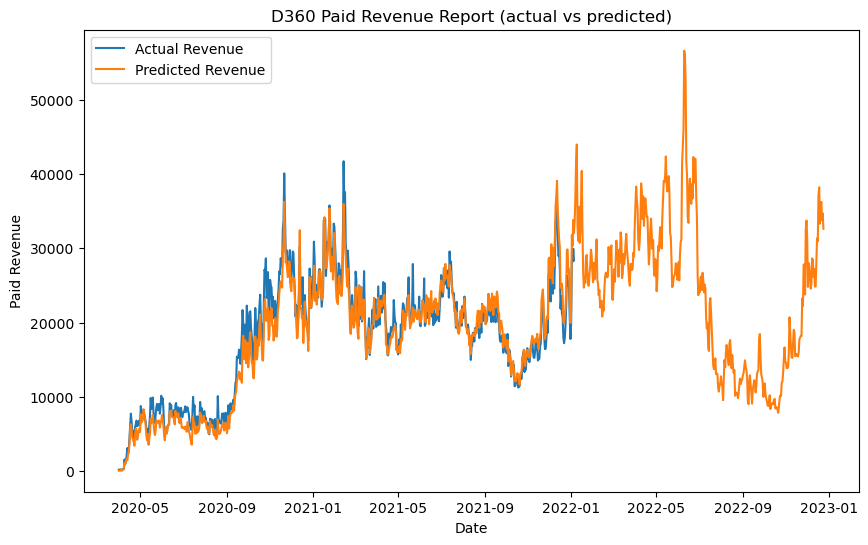

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping and data preparation
plot_df = roas_report.groupby('date')['d360_paid_revenue'].sum().reset_index()
plot_df = plot_df[plot_df['d360_paid_revenue'] != 0]

plot_df2 = p_roas_report.groupby('date')['d360_paid_revenue'].sum().reset_index()
plot_df2 = plot_df2[plot_df2['d360_paid_revenue'] != 0]

# Set the Seaborn style
# sns.set(style="darkgrid")

# Create a Seaborn plot
plt.figure(figsize=(10, 6))

sns.lineplot(data=plot_df, x='date', y='d360_paid_revenue', label='Actual Revenue')
sns.lineplot(data=plot_df2, x='date', y='d360_paid_revenue', label='Predicted Revenue')

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('Paid Revenue')
plt.title('D360 Paid Revenue Report (actual vs predicted)')

# Set legend position
plt.legend(loc='upper left')

# Show the Seaborn plot
plt.show()


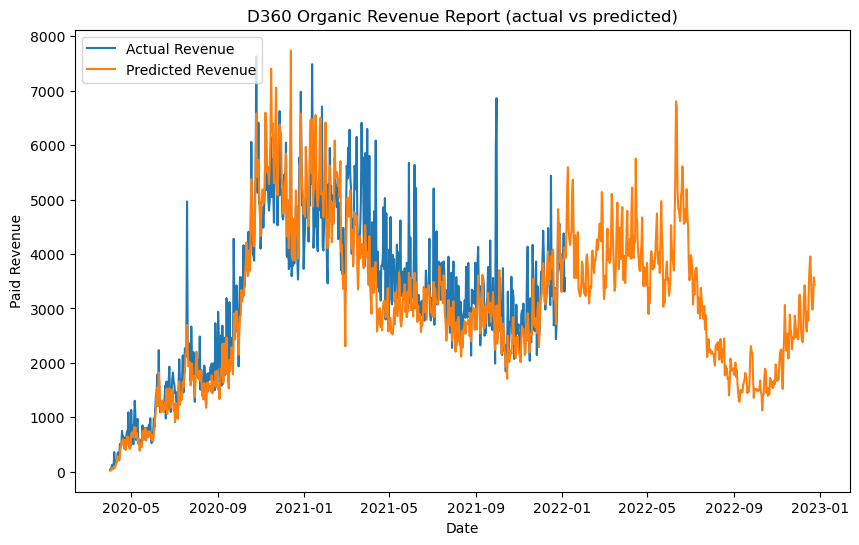

In [44]:
# Grouping and data preparation
plot_df = roas_report.groupby('date')['d360_organic_revenue'].sum().reset_index()
plot_df = plot_df[plot_df['d360_organic_revenue'] != 0]

plot_df2 = p_roas_report.groupby('date')['d360_organic_revenue'].sum().reset_index()
plot_df2 = plot_df2[plot_df2['d360_organic_revenue'] != 0]

# Set the Seaborn style
# sns.set(style="darkgrid")

# Create a Seaborn plot
plt.figure(figsize=(10, 6))

sns.lineplot(data=plot_df, x='date', y='d360_organic_revenue', label='Actual Revenue')
sns.lineplot(data=plot_df2, x='date', y='d360_organic_revenue', label='Predicted Revenue')

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('Paid Revenue')
plt.title('D360 Organic Revenue Report (actual vs predicted)')

# Set legend position
plt.legend(loc='upper left')

# Show the Seaborn plot
plt.show()


/var/folders/cc/psdqzrt5743dsmcrz03hh4zw0000gn/T/ipykernel_66007/1664520906.py:49: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


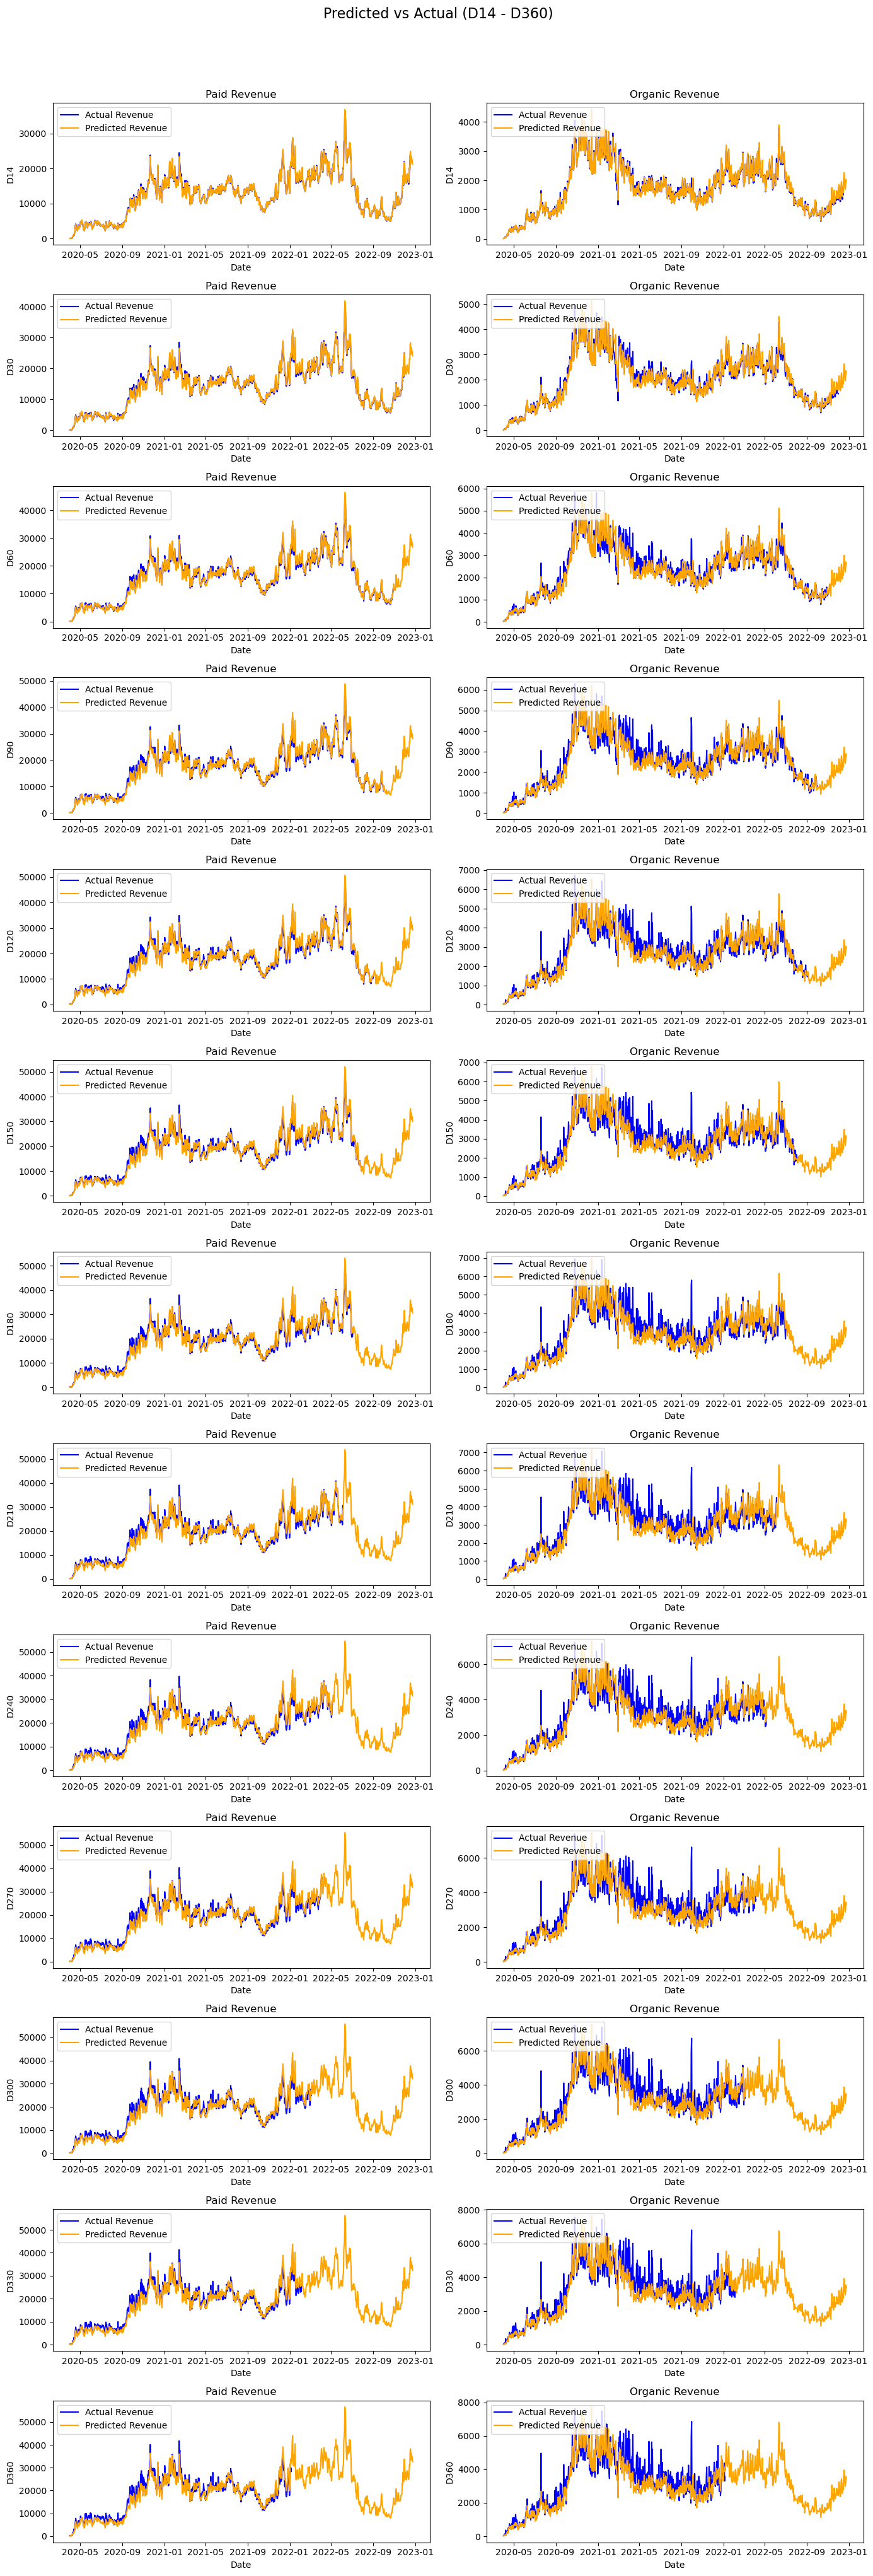

In [45]:
# Create a 7x2 grid of subplots
fig, axes = plt.subplots(nrows=13, ncols=2, figsize=(14, 40), constrained_layout=True)

# Set the Seaborn style
# sns.set(style="darkgrid")

# Limit the iterations to a total of 14 subplots
total_plots = 0

for i in range(len(test_cohorts)):
    for b_index, b in enumerate(buckets):
    
        if total_plots >= 26:
            break
        
        if i > 0:
            cohort = cohorts[i]
            prev_cohort = cohorts[i-1]
            
            actual_col = f'd{cohort}_{b}_revenue'
            
            # Grouping and data preparation
            plot_df = roas_report.groupby('date')[actual_col].sum().reset_index()
            plot_df = plot_df[plot_df[actual_col] != 0]

            plot_df2 = p_roas_report.groupby('date')[actual_col].sum().reset_index()
            plot_df2 = plot_df2[plot_df2[actual_col] != 0]

            # Create a Seaborn plot within the current subplot
            row_num = total_plots // 2
            col_num = total_plots % 2
            ax = axes[row_num, col_num]
            
            sns.lineplot(data=plot_df, x='date', y=actual_col, label='Actual Revenue', color='blue', ax=ax)
            sns.lineplot(data=plot_df2, x='date', y=actual_col, label='Predicted Revenue', color='orange', ax=ax)

            # Set plot labels and title for the subplot
            ax.set_xlabel('Date')
            ax.set_ylabel(f'D{cohort}')
            ax.set_title(f'{b} Revenue'.title())

            # Set legend for the subplot
            ax.legend(loc='upper left')
            
            total_plots += 1

# Adjust overall layout
plt.suptitle("Predicted vs Actual (D14 - D360)", y=1.02, fontsize=16)
plt.tight_layout()

# Show the figure
plt.show()


/var/folders/cc/psdqzrt5743dsmcrz03hh4zw0000gn/T/ipykernel_66007/88682918.py:48: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


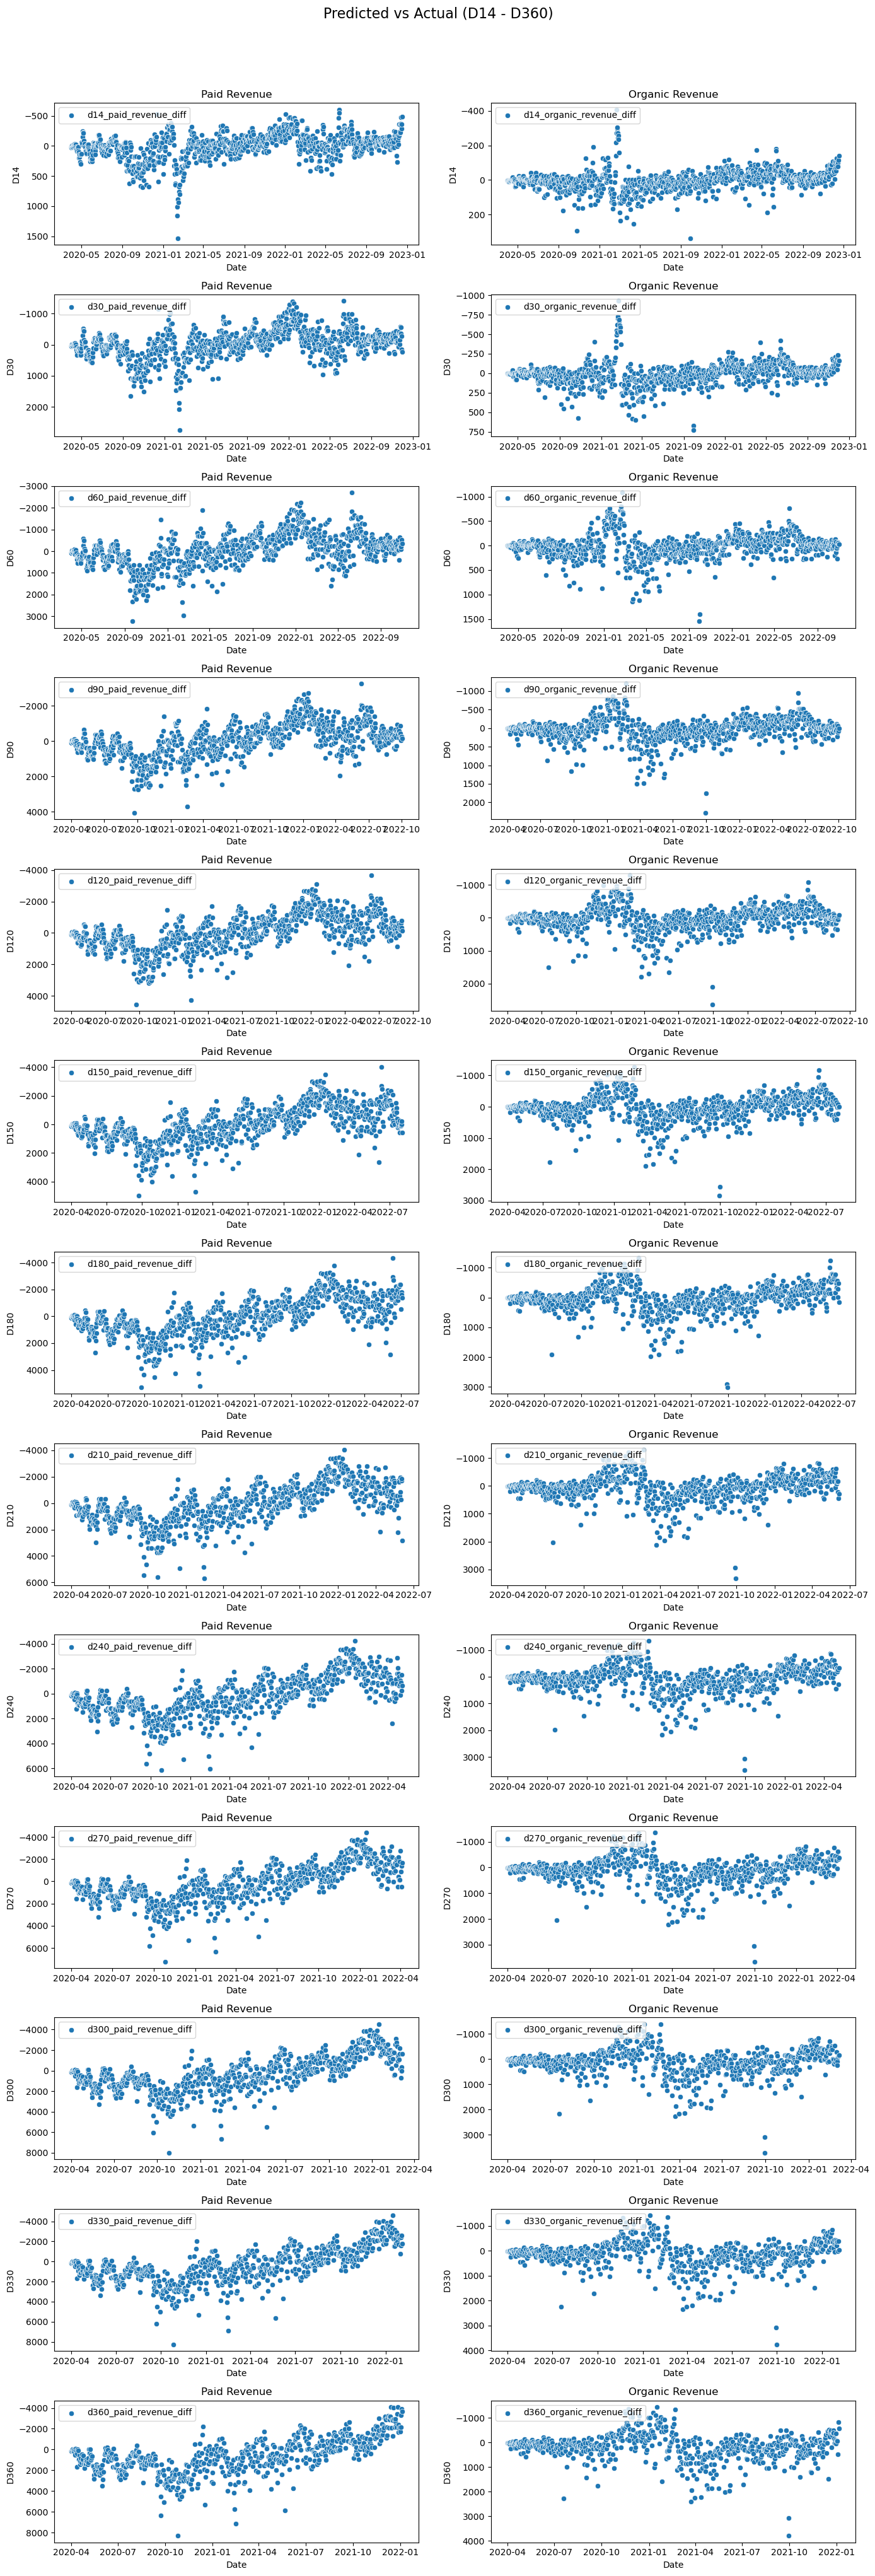

In [46]:

# Create a 7x2 grid of subplots
fig, axes = plt.subplots(nrows=13, ncols=2, figsize=(14, 40), constrained_layout=True)

# Set the Seaborn style
# sns.set(style="darkgrid")

# Limit the iterations to a total of 14 subplots
total_plots = 0

for i in range(len(test_cohorts)):
    for b_index, b in enumerate(buckets):
    
        if total_plots >= 26:
            break
        
        if i > 0:
            cohort = cohorts[i]
            prev_cohort = cohorts[i-1]
            
            actual_col = f'd{cohort}_{b}_revenue'


            plot_df = roas_report[['date', actual_col]].groupby(['date']).sum()
            plot_df2 = p_roas_report[['date', actual_col]].groupby(['date']).sum()
            
            plot_df2[f'{actual_col}_diff'] = np.where(plot_df[actual_col] <= 0, None, plot_df[actual_col] - plot_df2[actual_col])


            # Create a Seaborn plot within the current subplot
            row_num = total_plots // 2
            col_num = total_plots % 2
            ax = axes[row_num, col_num]
            
            sns.scatterplot(data=plot_df2, x='date', y=f'{actual_col}_diff', label=f'{actual_col}_diff', ax=ax)

            # Set plot labels and title for the subplot
            ax.set_xlabel('Date')
            ax.set_ylabel(f'D{cohort}')
            ax.set_title(f'{b} Revenue'.title())

            # Set legend for the subplot
            ax.legend(loc='upper left')
            
            total_plots += 1

# Adjust overall layout
plt.suptitle("Predicted vs Actual (D14 - D360)", y=1.02, fontsize=16)
plt.tight_layout()

# Show the figure
plt.show()
